In [1]:
import sys
!{sys.executable} -m pip install --user scikit-allel

In [1]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')

import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.3.8


### create a filtered VCF containing only invariant sites
vcftools --gzvcf "$OUTDIR/$INPUT" \
        --max-maf 0 \
        --recode --recode-INFO-all --stdout | bgzip -c > "$OUTDIR/$INVARIANT"

### create a filtered VCF containing only variant sites
vcftools --gzvcf "$OUTDIR/$INPUT" \
        --mac 1 \
        --recode --recode-INFO-all --stdout | bgzip -c > "$OUTDIR/$VARIANT"

### index both vcfs using tabix
tabix -f "$OUTDIR/$INVARIANT"
tabix -f "$OUTDIR/$VARIANT"

## Get data

In [47]:
#allel.vcf_to_hdf5('/users/mcevoysu/scratch/output/Aalba_random/Aalba_random_SPET_rawSNP_fromallsites.vcf.gz', '/users/mcevoysu/scratch/output/Aalba_random/jupytertest/Aalba_random_SPET_rawSNP_fromallsites.h5', fields='*', overwrite=True)
#allel.vcf_to_hdf5('/users/mcevoysu/scratch/output/Aalba_random/gatk_allsites/Aalba_random_SPET_variant_bcftools.g.vcf.gz', '/users/mcevoysu/scratch/output/Aalba_random/jupytertest/Aalba_random_SPET_variant_bcftools.h5', fields='*', overwrite=True)
#allel.vcf_to_hdf5('/users/mcevoysu/scratch/output/Aalba_random/gatk_allsites/Aalba_random_SPET_variant_bcftools_v.g.vcf.gz', '/users/mcevoysu/scratch/output/Aalba_random/jupytertest/Aalba_random_SPET_variant_bcftools_v.h5', fields='*', overwrite=True)
#allel.vcf_to_hdf5('/users/mcevoysu/scratch/output/Aalba_random/gatk_allsites/Aalba_random_SPET_variant_bcftools_v_V.g.vcf.gz', '/users/mcevoysu/scratch/output/Aalba_random/jupytertest/Aalba_random_SPET_variant_bcftools_v_V.h5', fields='*', overwrite=True)
allel.vcf_to_hdf5('/users/mcevoysu/scratch/output/Aalba_random/gatk_allsites/Aalba_random_SPET_variant_bcftools_v_V_bnd.g.vcf.gz', '/users/mcevoysu/scratch/output/Aalba_random/jupytertest/Aalba_random_SPET_variant_bcftools_v_V_bnd.h5', fields='*', overwrite=True)

In [42]:
callset_fn = '/users/mcevoysu/scratch/output/Aalba_random/jupytertest/Aalba_random_SPET_allsites.h5'
callset_all = h5py.File(callset_fn, mode='r')

In [16]:
callset_var_fn = '/users/mcevoysu/scratch/output/Aalba_random/jupytertest/Aalba_random_SPET_variant.h5'
callset_var = h5py.File(callset_var_fn, mode='r')

In [14]:
callset_gatksnps_fn = '/users/mcevoysu/scratch/output/Aalba_random/jupytertest/Aalba_random_SPET_rawSNP_fromallsites.h5'
callset_gatksnps = h5py.File(callset_gatksnps_fn, mode='r')

In [34]:
callset_rawsnp_fn = '/users/mcevoysu/scratch/output/Aalba_random/jupytertest/Aalba_random_SPET_rawSNP.h5'
callset_rawsnp = h5py.File(callset_rawsnp_fn, mode='r')

In [2]:
callset_bcftools_fn = '/users/mcevoysu/scratch/output/Aalba_random/jupytertest/Aalba_random_SPET_variant_bcftools.h5'
callset_bcftools = h5py.File(callset_bcftools_fn, mode='r')

In [3]:
callset_bcftools_v_fn = '/users/mcevoysu/scratch/output/Aalba_random/jupytertest/Aalba_random_SPET_variant_bcftools_v.h5'
callset_bcftools_v = h5py.File(callset_bcftools_v_fn, mode='r')

In [4]:
callset_bcftools_v_V_fn = '/users/mcevoysu/scratch/output/Aalba_random/jupytertest/Aalba_random_SPET_variant_bcftools_v_V.h5'
callset_bcftools_v_V = h5py.File(callset_bcftools_v_V_fn, mode='r')

In [5]:
callset_bcftools_bnd_fn = '/users/mcevoysu/scratch/output/Aalba_random/jupytertest/Aalba_random_SPET_variant_bcftools_v_V_bnd.h5'
callset_bcftools_bnd = h5py.File(callset_bcftools_bnd_fn, mode='r')

In [10]:
list(callset_var)

['calldata', 'samples', 'variants']

In [11]:
list(callset_var['calldata'])

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'PS', 'RGQ', 'SB']

In [12]:
list(callset_var['variants'])

['AC',
 'AF',
 'ALT',
 'AN',
 'BaseQRankSum',
 'CHROM',
 'DP',
 'END',
 'ExcessHet',
 'FILTER_LowQual',
 'FILTER_PASS',
 'FS',
 'ID',
 'InbreedingCoeff',
 'MLEAC',
 'MLEAF',
 'MQ',
 'MQRankSum',
 'POS',
 'QD',
 'QUAL',
 'RAW_MQandDP',
 'REF',
 'ReadPosRankSum',
 'SOR',
 'altlen',
 'is_snp',
 'numalt']

## Make datasets

In [38]:
#all = allel.VariantChunkedTable(callset_all['variants'])
np.count_nonzero(all)

2786392

In [39]:
all

<VariantChunkedTable shape=(2786392,) dtype=[('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')]
   nbytes=475.7M cbytes=58.7M cratio=8.1
   values=h5py._hl.group.Group>

In [21]:
# vcftools separated variants - is_snp = 141944
variants = allel.VariantChunkedTable(callset_var['variants'])
variants
#variants_np = variants[:]
#rawsnps = variants_np.query('(is_snp == True)')

<VariantChunkedTable shape=(245823,) dtype=[('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')]
   nbytes=42.0M cbytes=9.2M cratio=4.5
   values=h5py._hl.group.Group>

In [22]:
# gatk filt snps directly from gatk all
gatksnps = allel.VariantChunkedTable(callset_gatksnps['variants'])
gatksnps
#gatksnps_np = variants[:]

<VariantChunkedTable shape=(219051,) dtype=[('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')]
   nbytes=37.4M cbytes=8.0M cratio=4.7
   values=h5py._hl.group.Group>

In [4]:
# gatk filt snp from vcftools separated variants
bcftools = allel.VariantChunkedTable(callset_bcftools['variants'])
bcftools_np = bcftools[:]
bcftools

<VariantChunkedTable shape=(246634,) dtype=[('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')]
   nbytes=42.1M cbytes=9.3M cratio=4.5
   values=h5py._hl.group.Group>

In [5]:
filter_expression = '(is_snp == True)'
bcftools_snps = bcftools_np.query(filter_expression)[:]
bcftools_snps

<VariantTable shape=(141944,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 2, -1, -1], [0.002315,      nan,      nan], [b'C', b'', b''], 864, -1.039, b'aalba5_s00000025', 14531, -1, 0.0061, False, False, 4.224, b'.', 0.0006, [ 5, -1, -1], [0.005787,      nan,      nan], 60.,  0., 190697,  2.63,   52.53, [-1, -1], b'T', 0.816, 0.188, [0, 0, 0],  True, 1)
 ([ 2, -1, -1], [0.002315,      nan,      nan], [b'C', b'', b''], 864,  0.319, b'aalba5_s00000025', 12506, -1, 0.0053, False, False, 0.   , b'.', 0.0651, [ 1, -1, -1], [0.001157,      nan,      nan], 60.,  0., 190736,  1.74,   41.68, [-1, -1], b'T', 2.1  , 0.527, [0, 0, 0],  True, 1)
 ([14, -1, -1], [0.016   ,      nan,      nan], [b'T', b'', b''], 864,  0.214, b'aalba5_s00000025', 12170, -1, 0.4864, False, False, 0.924, b'.', 0.077 , [15, -1, -1], [0.017   ,      nan,      nan], 60.,  0., 190747, 10.61, 3256.1 , [-1, -1], b'C', 0.288, 0.61 , [0, 0, 0],  True, 1)
 ...
 ([ 2, -1, -1], [0.002315,      nan,      nan], [b'A', b'', b''], 864,  0.   , b'aalba5_s00422950',   703, -1, 0.0079, False, False, 0.   , b'.', 0.3192, [ 4, -1, -1], [0.00463 ,      nan,      nan], 60.,  0.,   2400, 14.79,   73.94, [-1, -1], b'G', 1.65 , 0.495, [0, 0, 0],  True, 1)
 ([ 2, -1, -1], [0.002315,      nan,      nan], [b'G', b'', b''], 864,    nan, b'aalba5_s00422950',   508, -1, 0.    , False, False, 0.   , b'.', 0.3516, [ 3, -1, -1], [0.003472,      nan,      nan], 60., nan,   2431, 34.35,  103.05, [-1, -1], b'A',   nan, 2.833, [0, 0, 0],  True, 1)
 ([ 2, -1, -1], [0.002315,      nan,      nan], [b'C', b'', b''], 864,    nan, b'aalba5_s00422950',   218, -1, 0.    , False, False, 0.   , b'.', 0.3548, [ 6, -1, -1], [0.006944,      nan,      nan], 60., nan,   2491, 27.53,   42.2 , [-1, -1], b'T',   nan, 1.609, [0, 0, 0],  True, 1)]

In [6]:
bcftools_v = allel.VariantChunkedTable(callset_bcftools_v['variants'])
#bcftools_v_np = bcftools_v[:]
np.count_nonzero(bcftools_v)

151423

In [7]:
bcftools_v_V = allel.VariantChunkedTable(callset_bcftools_v_V['variants'])
np.count_nonzero(bcftools_v_V)

148570

In [8]:
bcftools_bnd = allel.VariantChunkedTable(callset_bcftools_bnd['variants'])
np.count_nonzero(bcftools_bnd)

148570

In [36]:
bcftools_v

<VariantChunkedTable shape=(151423,) dtype=[('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')]
   nbytes=25.8M cbytes=6.0M cratio=4.3
   values=h5py._hl.group.Group>

In [39]:
filter_expression = '(is_snp == True)'
bcftools_v_snps = bcftools_v_np.query(filter_expression)[:]
np.count_nonzero(bcftools_v_snps)

141944

In [40]:
filter_expression = '(is_snp == False)'
bcftools_v_notsnps = bcftools_v_np.query(filter_expression)[:]
bcftools_v_notsnps

<VariantTable shape=(9479,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 28,   2,  -1], [0.032   , 0.002315,      nan], [b'C', b'*', b''], 864, 0.423, b'aalba5_s00000025', 11564, -1, 0.0045, False, False, 0.   , b'.', 0.1473, [ 31,   2,  -1], [0.036   , 0.002315,      nan], 60., 0., 190772, 11.08, 8.75086e+03, [-1, -1], b'T',  0.519, 0.652, [ 0, -1,  0], False, 2)
 ([  1,   1,  -1], [0.001157, 0.001157,      nan], [b'*', b'G', b''], 864, 0.   , b'aalba5_s00000025',  2503, -1, 0.0058, False, False, 0.   , b'.', 0.3177, [  1,   1,  -1], [0.001157, 0.001157,      nan], 60., 0., 190889,  2.25, 3.83300e+01, [-1, -1], b'A',  1.98 , 0.12 , [-1,  0,  0], False, 2)
 ([  3,   1,  -1], [0.003472, 0.001157,      nan], [b'A', b'GC', b''], 864, 0.674, b'aalba5_s00000033',  4039, -1, 0.    , False, False, 0.   , b'.', 0.2613, [  2,   1,  -1], [0.002315, 0.001157,      nan], 60., 0.,  45334, 10.43, 1.35550e+02, [-1, -1], b'AC',  0.366, 0.473, [-1,  0,  0], False, 2)
 ...
 ([360,   2,  -1], [0.417   , 0.002315,      nan], [b'G', b'TTG', b''], 864, 0.18 , b'aalba5_s00421581',  1096, -1, 0.0003, False, False, 0.   , b'.', 0.4955, [814,   5,  -1], [0.942   , 0.005787,      nan], 60., 0.,   3711, 32.06, 5.14707e+04, [-1, -1], b'T',  0.328, 8.353, [ 0,  2,  0], False, 2)
 ([  6,   3,  -1], [0.006944, 0.003472,      nan], [b'*', b'T', b''], 864, 0.   , b'aalba5_s00422183',  5607, -1, 0.1927, False, False, 5.551, b'.', 0.2207, [  4,   2,  -1], [0.00463 , 0.002315,      nan], 60., 0.,   5214,  0.46, 5.64700e+01, [-1, -1], b'C',  0.862, 0.46 , [-1,  0,  0], False, 2)
 ([  1,  16,  -1], [0.001157, 0.019   ,      nan], [b'C', b'*', b''], 864, 0.   , b'aalba5_s00422183',  1566, -1, 0.    , False, False, 0.   , b'.', 0.3551, [  2,  21,  -1], [0.002315, 0.024   ,      nan], 60., 0.,   5372,  0.56, 3.78300e+01, [-1, -1], b'T', -2.1  , 1.318, [ 0, -1,  0], False, 2)]

In [46]:
filter_expression = '(is_snp == False)'
bcftools_v_V_notsnps = bcftools_v_V_np.query(filter_expression)[:]
bcftools_v_V_notsnps

<VariantTable shape=(6626,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([28,  2, -1], [0.032   , 0.002315,      nan], [b'C', b'*', b''], 864, 0.423, b'aalba5_s00000025', 11564, -1, 4.500e-03, False, False, 0.   , b'.', 0.1473, [31,  2, -1], [0.036   , 0.002315,      nan], 60., 0., 190772, 11.08, 8750.86, [-1, -1], b'T',  0.519, 0.652, [ 0, -1,  0], False, 2)
 ([ 1,  1, -1], [0.001157, 0.001157,      nan], [b'*', b'G', b''], 864, 0.   , b'aalba5_s00000025',  2503, -1, 5.800e-03, False, False, 0.   , b'.', 0.3177, [ 1,  1, -1], [0.001157, 0.001157,      nan], 60., 0., 190889,  2.25,   38.33, [-1, -1], b'A',  1.98 , 0.12 , [-1,  0,  0], False, 2)
 ([ 3,  2, -1], [0.003472, 0.002315,      nan], [b'*', b'T', b''], 864, 0.   , b'aalba5_s00000033',  4046, -1, 1.000e-04, False, False, 0.   , b'.', 0.2195, [ 2,  2, -1], [0.002315, 0.002315,      nan], 60., 0.,  45335, 16.99,  543.78, [-1, -1], b'C',  1.21 , 0.88 , [-1,  0,  0], False, 2)
 ...
 ([ 9,  3, -1], [0.01    , 0.003472,      nan], [b'*', b'G', b''], 864, 0.   , b'aalba5_s00420688', 10427, -1, 3.502e-01, False, False, 3.018, b'.', 0.2128, [ 6,  3, -1], [0.006944, 0.003472,      nan], 60., 0.,   3077,  0.44,   80.95, [-1, -1], b'A',  0.444, 0.467, [-1,  0,  0], False, 2)
 ([ 6,  3, -1], [0.006944, 0.003472,      nan], [b'*', b'T', b''], 864, 0.   , b'aalba5_s00422183',  5607, -1, 1.927e-01, False, False, 5.551, b'.', 0.2207, [ 4,  2, -1], [0.00463 , 0.002315,      nan], 60., 0.,   5214,  0.46,   56.47, [-1, -1], b'C',  0.862, 0.46 , [-1,  0,  0], False, 2)
 ([ 1, 16, -1], [0.001157, 0.019   ,      nan], [b'C', b'*', b''], 864, 0.   , b'aalba5_s00422183',  1566, -1, 0.000e+00, False, False, 0.   , b'.', 0.3551, [ 2, 21, -1], [0.002315, 0.024   ,      nan], 60., 0.,   5372,  0.56,   37.83, [-1, -1], b'T', -2.1  , 1.318, [ 0, -1,  0], False, 2)]

## Filter guidance

* https://gatk.broadinstitute.org/hc/en-us/articles/360035890471-Hard-filtering-germline-short-variants (good explanation of annotations)
* https://speciationgenomics.github.io/filtering_vcfs/ (recommended by Pixy)
* https://www.ddocent.com//filtering/ (more for FreeBayes)
* Scikit-allel
  * https://alimanfoo.github.io/2016/06/10/scikit-allel-tour.html
  * https://alimanfoo.github.io/2017/06/14/read-vcf.html
  * https://alimanfoo.github.io/2018/04/09/selecting-variants.html

## Plot function

In [21]:
filter_expression = '(numalt == 1)'
biallelic_snps = bcftools_snps.query(filter_expression)[:]
np.count_nonzero(biallelic_snps)

138760

In [8]:
def plot_hist(f, dsubset='', xscale='', bins=30 ):
    if dsubset == 'invar':
        x = invariants[f][:]
        l = 'Invariant'
    elif dsubset == 'var':
        x = variants[f][:]
        l = 'Variant'
    elif dsubset == 'snp':
        x = rawsnps[f][:]
        l = 'Raw SNP'
    elif dsubset == 'indel':
        x = rawindels[f][:]
        l = 'Raw Indel'
    elif dsubset == 'sel':
        x = snp_selection[f][:]
        l = 'Filtered SNP'
    elif dsubset == 'isel':
        x = indel_selection[f][:]
        l = 'Filtered Indel'
    elif dsubset == 'biallelic':
        x = biallelic_snps[f][:]
        l = 'Biallelic SNP'
    else:
        x = allsites[f][:]
        l = 'Allsites'
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')
    ax.set_title('%s %s distribution' % (l, f))
    if xscale == 'log':
        ax.set_xscale('log')

## QD - Variant Confidence/Quality by Depth

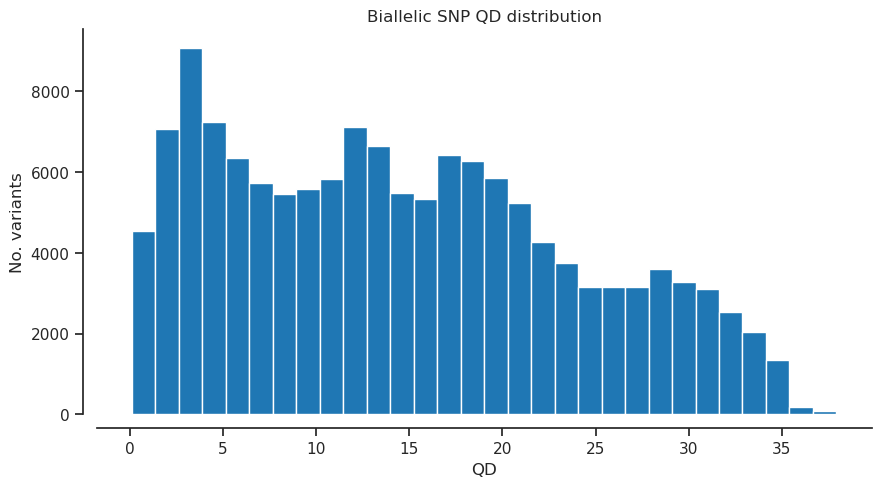

In [9]:
plot_hist('QD','biallelic') # Variant Confidence/Quality by Depth

In [11]:
filter_expression = '(QD < 2.0)'
snp_selection = biallelic_snps.query(filter_expression)[:]

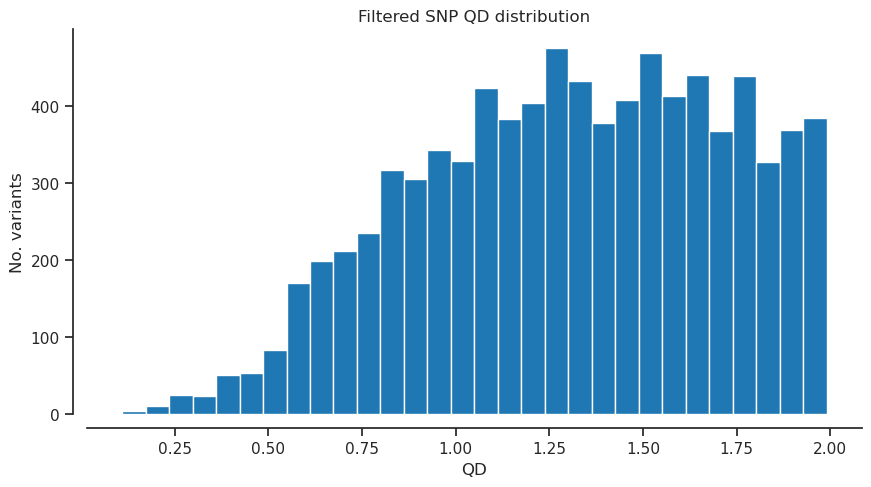

In [12]:
plot_hist('QD','sel') # Filtered out

In [22]:
filter_expression = '(QD >= 2.0)'
biallelic_snps = biallelic_snps.query(filter_expression)[:]

In [23]:
np.count_nonzero(biallelic_snps)

130296

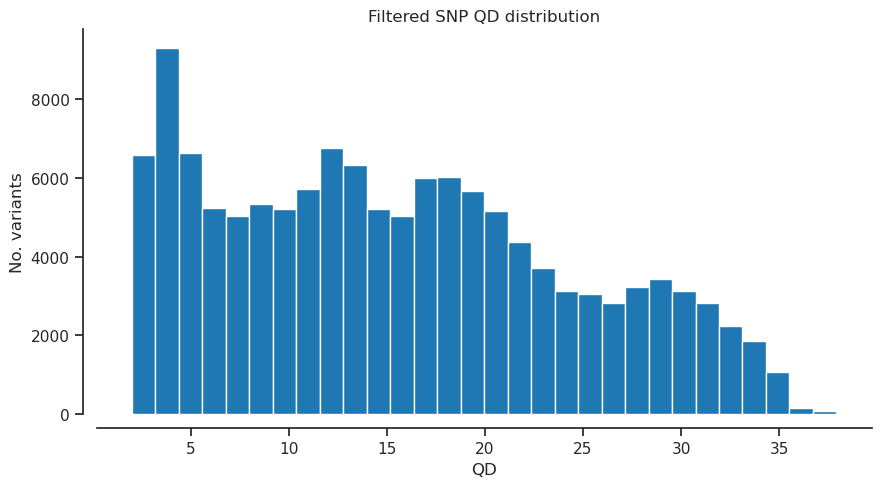

In [12]:
plot_hist('QD','sel') # Retained

## MQ - RMS mapping quality

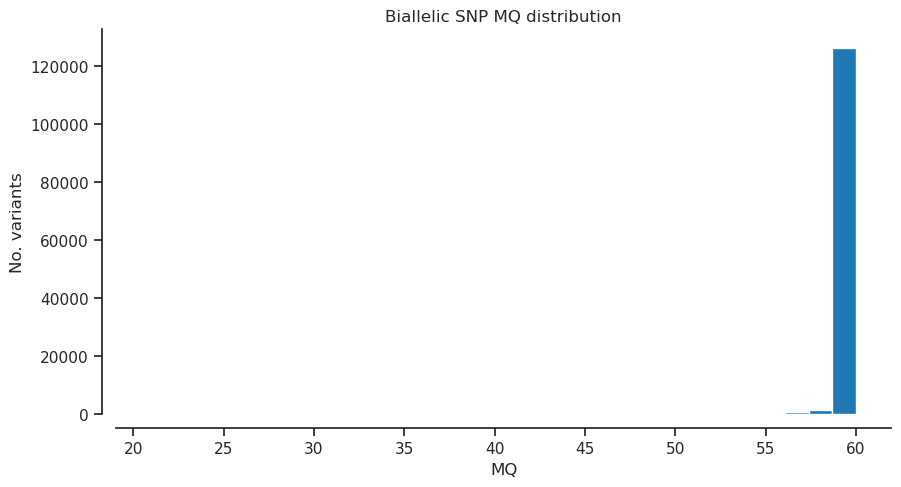

In [16]:
plot_hist('MQ','biallelic')

In [105]:
filter_expression = '(MQ >= 20.0) & (MQ <= 50)'
#filter_expression = '(MQ >= 38.0) & (MQ <= 50)'
snp_selection = biallelic_snps.query(filter_expression)[:]

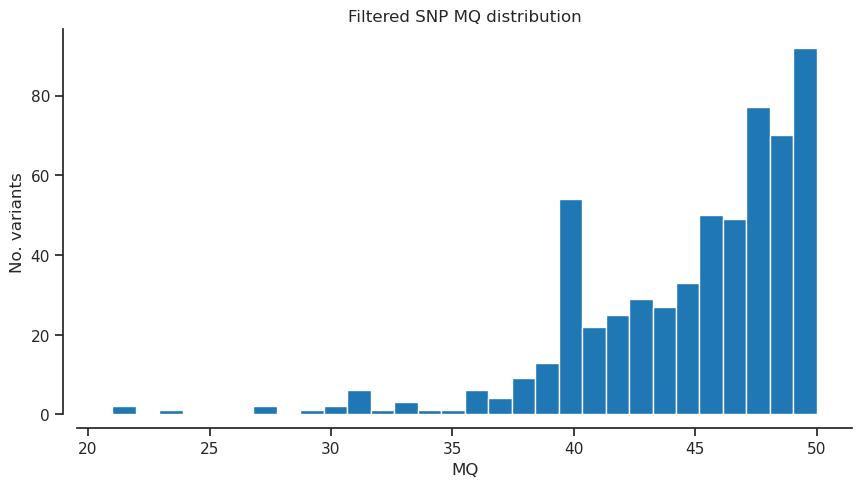

In [106]:
plot_hist('MQ','sel')

In [24]:
filter_expression = '(MQ >= 40.0)'
biallelic_snps = biallelic_snps.query(filter_expression)[:]

In [25]:
np.count_nonzero(biallelic_snps)

130231

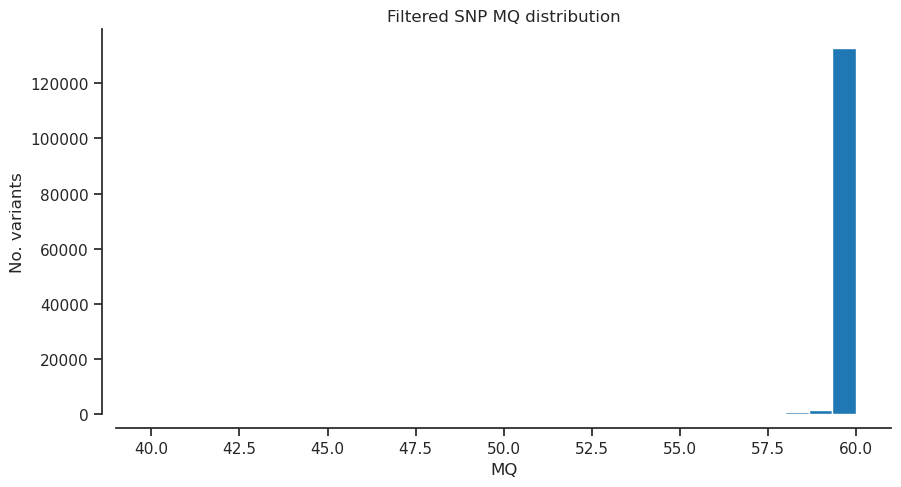

In [108]:
plot_hist('MQ','sel')

## MQRankSum - Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

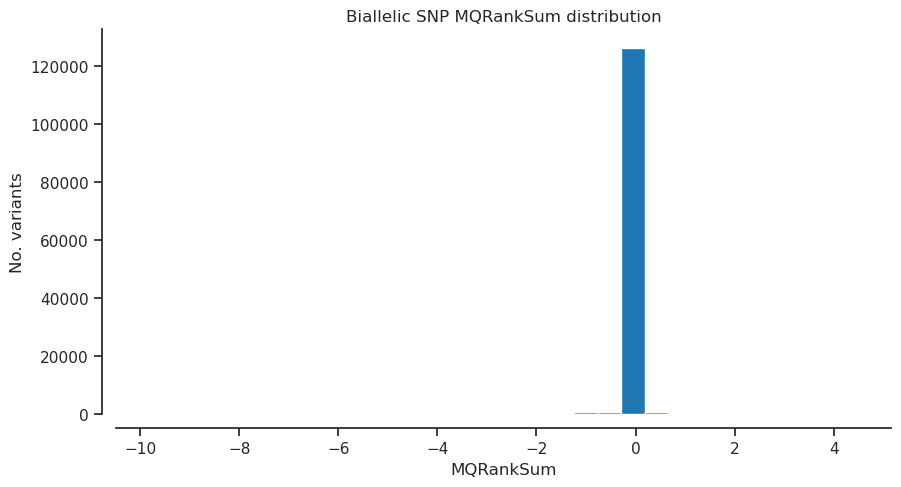

In [42]:
plot_hist('MQRankSum', 'biallelic') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

In [12]:
# removing 0  just to see other values better
filter_expression = '(MQRankSum < 0) | (MQRankSum > 0)' 
snp_selection = biallelic_snps.query(filter_expression)[:]

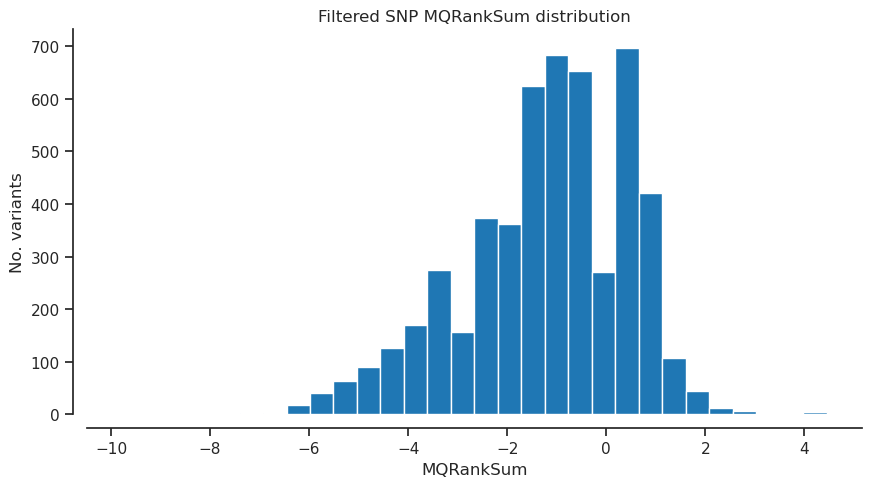

In [93]:
plot_hist('MQRankSum', 'sel') # Filtered out - nothing is filtered out by this

In [26]:
filter_expression = '(MQRankSum >= -12.5)'
biallelic_snps = biallelic_snps.query(filter_expression)[:]
# nothing is filtered out in the data

In [27]:
np.count_nonzero(biallelic_snps)

122679

## ReadPosRankSum - Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

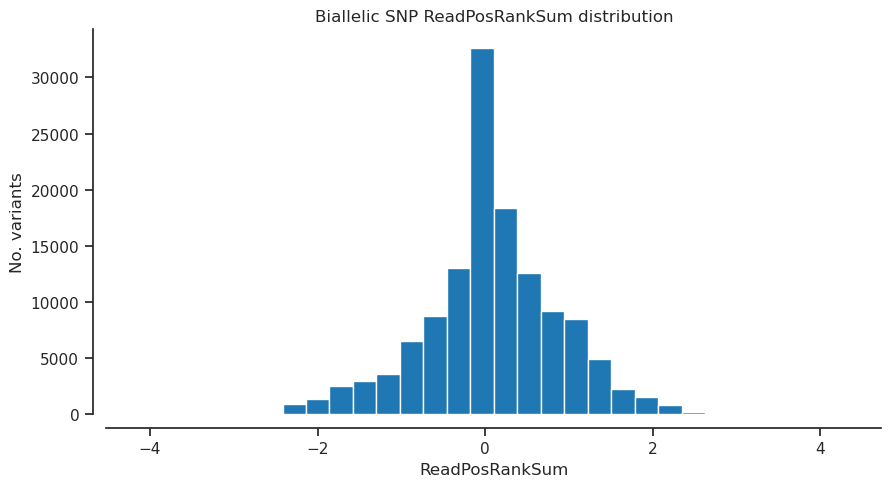

In [24]:
plot_hist('ReadPosRankSum','biallelic') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias
# nothing falls outside of hard filter

## SOR - Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

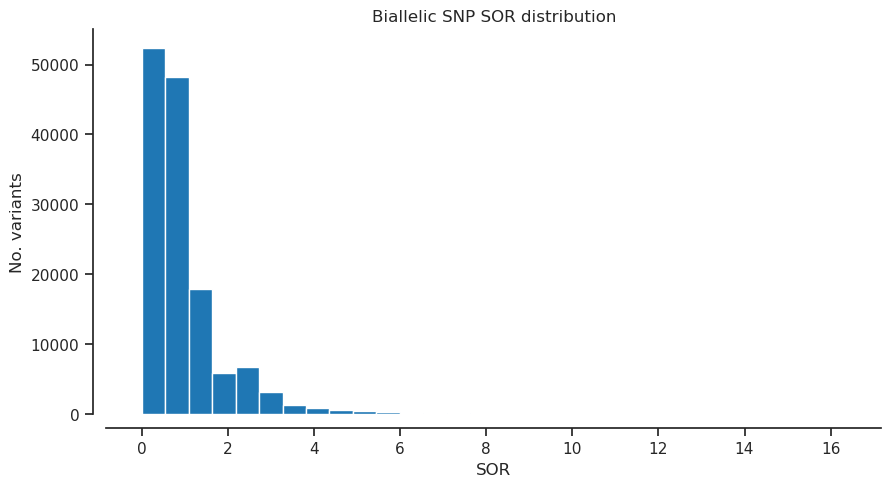

In [40]:
plot_hist('SOR','biallelic') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

In [10]:
filter_expression = '(SOR > 3.0)'
snp_selection = biallelic_snps.query(filter_expression)[:]
snp_selection

<VariantTable shape=(5782,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([201,  -1,  -1], [0.233   ,      nan,      nan], [b'G', b'', b''], 864,  0.  , b'aalba5_s00000033',  454, -1, 0.0e+00, False, False, 0., b'.', 0.3856, [735,  -1,  -1], [0.851  ,     nan,     nan], 59.97, 0.,  45544, 25.36,  20427.8 , [-1, -1], b'A',  0.   , 6.244, [0, 0, 0],  True, 1)
 ([467,  -1,  -1], [0.541   ,      nan,      nan], [b'G', b'', b''], 864,  0.  , b'aalba5_s00000080', 3628, -1, 0.0e+00, False, False, 0., b'.', 0.2439, [566,  -1,  -1], [0.655  ,     nan,     nan], 59.99, 0.,  27898, 30.97, 109842.  , [-1, -1], b'A',  0.201, 3.06 , [0, 0, 0],  True, 1)
 ([745,  -1,  -1], [0.862   ,      nan,      nan], [b'T', b'', b''], 864,  0.  , b'aalba5_s00000084', 4376, -1, 3.1e-03, False, False, 0., b'.', 0.3035, [815,  -1,  -1], [0.943  ,     nan,     nan], 60.  , 0., 126918, 27.24, 169547.  , [-1, -1], b'G',  0.   , 6.375, [0, 0, 0],  True, 1)
 ...
 ([ 15,  -1,  -1], [0.017   ,      nan,      nan], [b'A', b'', b''], 864,  0.  , b'aalba5_s00420626',  376, -1, 0.0e+00, False, False, 0., b'.', 0.3257, [ 35,  -1,  -1], [0.041  ,     nan,     nan], 60.  , 0.,   4813, 29.13,    770.43, [-1, -1], b'G',  0.   , 3.352, [0, 0, 0],  True, 1)
 ([  3,  -1,  -1], [0.003472,      nan,      nan], [b'A', b'', b''], 864, -0.21, b'aalba5_s00422165', 1181, -1, 0.0e+00, False, False, 0., b'.', 0.3918, [  4,  -1,  -1], [0.00463,     nan,     nan], 60.  , 0.,   3005, 26.76,    240.86, [-1, -1], b'G',  0.21 , 3.056, [0, 0, 0],  True, 1)
 ([624,  -1,  -1], [0.722   ,      nan,      nan], [b'G', b'', b''], 864,  0.  , b'aalba5_s00422183', 2408, -1, 1.0e-04, False, False, 0., b'.', 0.3546, [794,  -1,  -1], [0.919  ,     nan,     nan], 60.  , 0.,   5309, 27.88,  94334.5 , [-1, -1], b'C', -0.431, 5.658, [0, 0, 0],  True, 1)]

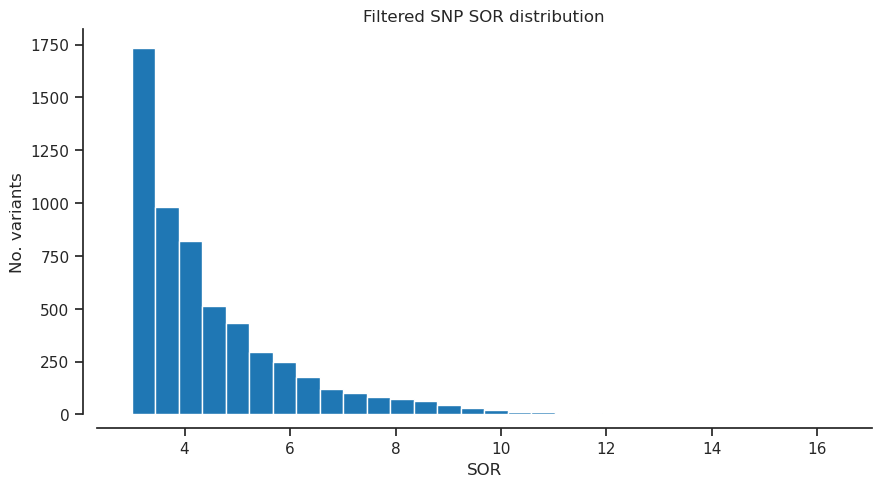

In [65]:
plot_hist('SOR','sel',xscale='')

In [28]:
filter_expression = '(SOR <= 3.0)'
biallelic_snps = biallelic_snps.query(filter_expression)[:]

In [29]:
np.count_nonzero(biallelic_snps)

118557

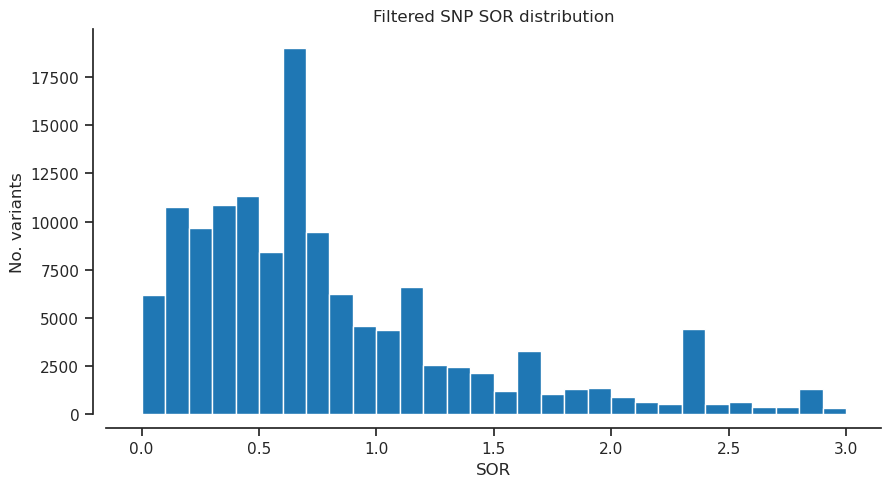

In [8]:
plot_hist('SOR','sel',xscale='')

## FS

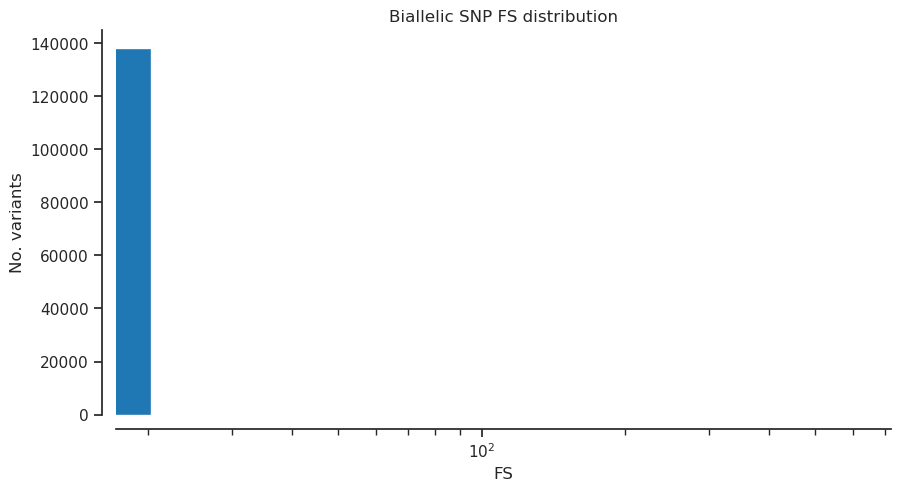

In [31]:
plot_hist('FS','biallelic',xscale='log')

In [50]:
filter_expression = '(FS > 0.0) & (FS < 1.0)'
snp_selection = biallelic_snps.query(filter_expression)[:]
snp_selection

<VariantTable shape=(5534,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 14,  -1,  -1], [0.016,   nan,   nan], [b'T', b'', b''], 864,  0.214, b'aalba5_s00000025', 12170, -1, 0.4864, False, False, 0.924, b'.', 0.077 , [ 15,  -1,  -1], [0.017,   nan,   nan], 60., 0., 190747, 10.61,  3256.1 , [-1, -1], b'C',  0.288, 0.61 , [0, 0, 0],  True, 1)
 ([ 10,  -1,  -1], [0.012,   nan,   nan], [b'T', b'', b''], 864, -0.068, b'aalba5_s00000080', 17764, -1, 0.0038, False, False, 0.446, b'.', 0.26  , [ 10,  -1,  -1], [0.012,   nan,   nan], 60., 0.,  27687, 12.73,  3283.1 , [-1, -1], b'C', -0.645, 0.644, [0, 0, 0],  True, 1)
 ([ 79,  -1,  -1], [0.091,   nan,   nan], [b'C', b'', b''], 864,  0.071, b'aalba5_s00000080', 17872, -1, 0.2477, False, False, 0.553, b'.', 0.0772, [ 80,  -1,  -1], [0.093,   nan,   nan], 60., 0.,  27691, 12.49, 39266.8 , [-1, -1], b'T',  0.197, 0.634, [0, 0, 0],  True, 1)
 ...
 ([211,  -1,  -1], [0.244,   nan,   nan], [b'C', b'', b''], 864,  0.843, b'aalba5_s00422165', 24415, -1, 2.7818, False, False, 0.557, b'.', 0.0098, [218,  -1,  -1], [0.252,   nan,   nan], 60., 0.,   2687, 10.47, 94890.9 , [-1, -1], b'T', -0.034, 0.711, [0, 0, 0],  True, 1)
 ([ 54,  -1,  -1], [0.063,   nan,   nan], [b'T', b'', b''], 864,  0.52 , b'aalba5_s00422584',  2633, -1, 0.    , False, False, 0.542, b'.', 0.4898, [101,  -1,  -1], [0.117,   nan,   nan], 60., 0.,   5852, 14.85,  8389.63, [-1, -1], b'G', -0.46 , 0.768, [0, 0, 0],  True, 1)
 ([ 24,  -1,  -1], [0.028,   nan,   nan], [b'T', b'', b''], 864,  0.   , b'aalba5_s00422950',  6845, -1, 0.1806, False, False, 0.407, b'.', 0.2504, [ 26,  -1,  -1], [0.03 ,   nan,   nan], 60., 0.,   2179,  9.7 ,  2879.68, [-1, -1], b'C', -0.344, 0.72 , [0, 0, 0],  True, 1)]

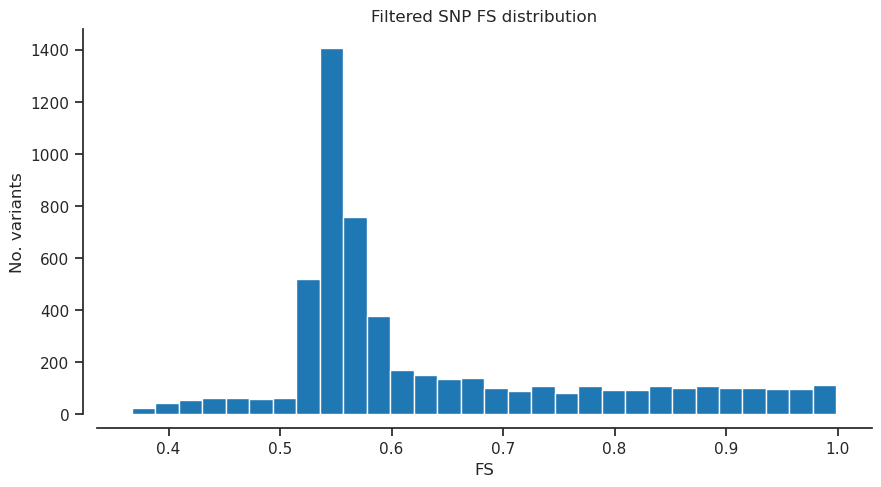

In [52]:
plot_hist('FS','sel',xscale='')

In [76]:
filter_expression = '(FS >= 10.0)'
snp_selection = biallelic_snps.query(filter_expression)[:]

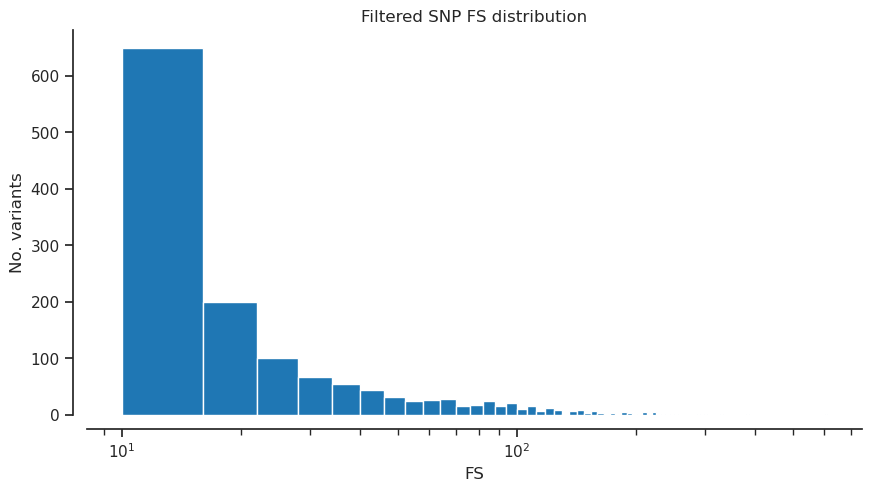

In [56]:
plot_hist('FS','sel',xscale='log',bins=100)

In [90]:
filter_expression = '(FS >= 100.0)'
snp_selection = biallelic_snps.query(filter_expression)[:]
snp_selection

<VariantTable shape=(112,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 63,  -1,  -1], [0.073   ,      nan,      nan], [b'T', b'', b''], 864,  0.   , b'aalba5_s00000239',  9969, -1, 1.11215e+01, False, False, 123.985, b'.', -0.034 , [ 69,  -1,  -1], [0.08    ,      nan,      nan], 57.77, -3.897,   2761,  7.52, 1.22098e+04, [-1, -1], b'C',  0.215, 3.0100e-01, [0, 0, 0],  True, 1)
 ([ 32,  -1,  -1], [0.037   ,      nan,      nan], [b'T', b'', b''], 864, -2.323, b'aalba5_s00000273',  4674, -1, 8.40000e-03, False, False, 184.54 , b'.',  0.1854, [ 34,  -1,  -1], [0.039   ,      nan,      nan], 60.  ,  0.   , 160253, 16.88, 9.02878e+03, [-1, -1], b'C', -1.886, 8.7300e-01, [0, 0, 0],  True, 1)
 ([184,  -1,  -1], [0.213   ,      nan,      nan], [b'T', b'', b''], 864, -0.967, b'aalba5_s00005883',   823, -1, 0.00000e+00, False, False, 288.482, b'.',  0.2923, [391,  -1,  -1], [0.453   ,      nan,      nan], 59.76,  0.   ,  38242, 25.49, 9.86274e+03, [-1, -1], b'C', -1.15 , 1.1740e+00, [0, 0, 0],  True, 1)
 ([235,  -1,  -1], [0.272   ,      nan,      nan], [b'G', b'', b''], 864, -0.712, b'aalba5_s00007032', 11660, -1, 1.60000e+02, False, False, 193.686, b'.', -0.4046, [257,  -1,  -1], [0.297   ,      nan,      nan], 60.  ,  0.   ,  10824,  1.74, 1.26314e+04, [-1, -1], b'T',  1.52 , 8.7990e+00, [0, 0, 0],  True, 1)
 ([  7,  -1,  -1], [0.008102,      nan,      nan], [b'A', b'', b''], 864, -1.414, b'aalba5_s00007032',  9604, -1, 1.11800e-01, False, False, 101.757, b'.',  0.1446, [  4,  -1,  -1], [0.00463 ,      nan,      nan], 60.  ,  0.   ,  10854,  0.31, 6.85900e+01, [-1, -1], b'T',  0.   , 7.4270e+00, [0, 0, 0],  True, 1)
 ([  8,  -1,  -1], [0.009259,      nan,      nan], [b'A', b'', b''], 864,  0.324, b'aalba5_s00008798',  3846, -1, 1.90000e-03, False, False, 152.576, b'.',  0.1869, [  9,  -1,  -1], [0.01    ,      nan,      nan], 60.  ,  0.   ,  79006,  4.39, 2.76430e+02, [-1, -1], b'T',  0.967, 4.3390e+00, [0, 0, 0],  True, 1)
 ([ 12,  -1,  -1], [0.014   ,      nan,      nan], [b'T', b'', b''], 864, -0.566, b'aalba5_s00009531',  3050, -1, 1.02000e-02, False, False, 116.629, b'.',  0.2443, [ 15,  -1,  -1], [0.017   ,      nan,      nan], 60.  ,  0.   ,  14770, 22.35, 2.92817e+03, [-1, -1], b'G', -0.957, 1.5200e-01, [0, 0, 0],  True, 1)
 ([ 82,  -1,  -1], [0.095   ,      nan,      nan], [b'C', b'', b''], 864, -1.803, b'aalba5_s00010053',  3109, -1, 8.37310e+00, False, False, 123.65 , b'.', -0.0373, [114,  -1,  -1], [0.132   ,      nan,      nan], 59.85,  0.   ,   4767,  7.75, 6.42979e+03, [-1, -1], b'T', -1.876, 0.0000e+00, [0, 0, 0],  True, 1)
 ([ 29,  -1,  -1], [0.034   ,      nan,      nan], [b'A', b'', b''], 864, -3.307, b'aalba5_s00024409',  4814, -1, 2.21700e+00, False, False, 189.678, b'.',  0.111 , [ 32,  -1,  -1], [0.037   ,      nan,      nan], 60.  ,  0.   ,  55982,  7.47, 3.58466e+03, [-1, -1], b'G', -0.493, 3.9200e-01, [0, 0, 0],  True, 1)
 ([ 24,  -1,  -1], [0.028   ,      nan,      nan], [b'T', b'', b''], 864, -3.307, b'aalba5_s00024409',  4689, -1, 1.50890e+00, False, False, 381.674, b'.',  0.1312, [ 27,  -1,  -1], [0.031   ,      nan,      nan], 60.  ,  0.   ,  55986,  8.76, 3.34495e+03, [-1, -1], b'C', -0.728, 4.3000e-01, [0, 0, 0],  True, 1)
 ([ 28,  -1,  -1], [0.032   ,      nan,      nan], [b'A', b'', b''], 864,  1.04 , b'aalba5_s00025825',  4829, -1, 0.00000e+00, False, False, 173.963, b'.',  0.3125, [ 30,  -1,  -1], [0.035   ,      nan,      nan], 60.  ,  0.   ,  43422, 13.09, 2.02933e+0

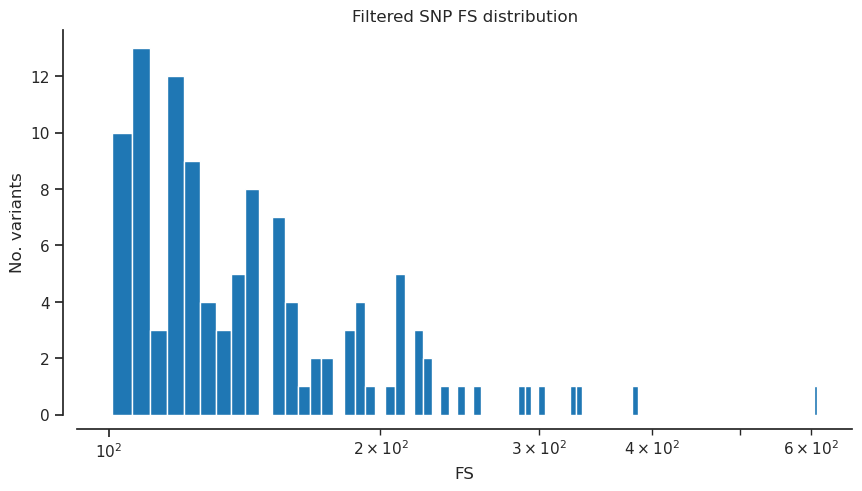

In [91]:
plot_hist('FS','sel',xscale='log',bins=100)

In [88]:
filter_expression = '(FS >= 60.0)'
snp_selection = biallelic_snps.query(filter_expression)[:]
snp_selection

<VariantTable shape=(247,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 63,  -1,  -1], [0.073   ,      nan,      nan], [b'T', b'', b''], 864,  0.   , b'aalba5_s00000239',  9969, -1, 1.112150e+01, False, False, 123.985, b'.', -0.034 , [ 69,  -1,  -1], [0.08    ,      nan,      nan], 57.77, -3.897,   2761,  7.52, 1.22098e+04, [-1, -1], b'C',  0.215, 3.0100e-01, [0, 0, 0],  True, 1)
 ([ 32,  -1,  -1], [0.037   ,      nan,      nan], [b'T', b'', b''], 864, -2.323, b'aalba5_s00000273',  4674, -1, 8.400000e-03, False, False, 184.54 , b'.',  0.1854, [ 34,  -1,  -1], [0.039   ,      nan,      nan], 60.  ,  0.   , 160253, 16.88, 9.02878e+03, [-1, -1], b'C', -1.886, 8.7300e-01, [0, 0, 0],  True, 1)
 ([ 74,  -1,  -1], [0.086   ,      nan,      nan], [b'T', b'', b''], 864, -2.878, b'aalba5_s00001203', 10063, -1, 3.970000e-02, False, False,  63.784, b'.',  0.1047, [ 78,  -1,  -1], [0.09    ,      nan,      nan], 60.  ,  0.   ,  44231, 18.29, 5.92484e+04, [-1, -1], b'C', -2.385, 9.2400e-01, [0, 0, 0],  True, 1)
 ([ 28,  -1,  -1], [0.032   ,      nan,      nan], [b'A', b'', b''], 864, -0.341, b'aalba5_s00001911',  4799, -1, 2.800000e-03, False, False,  77.447, b'.',  0.2015, [ 30,  -1,  -1], [0.035   ,      nan,      nan], 60.  ,  0.   ,   6409, 17.48, 5.62858e+03, [-1, -1], b'C',  0.524, 5.2110e+00, [0, 0, 0],  True, 1)
 ([ 70,  -1,  -1], [0.081   ,      nan,      nan], [b'T', b'', b''], 862, -0.253, b'aalba5_s00005242',   695, -1, 0.000000e+00, False, False,  67.885, b'.',  0.3371, [135,  -1,  -1], [0.157   ,      nan,      nan], 60.  ,  0.   ,  16500, 31.21, 6.21151e+03, [-1, -1], b'A', -0.524, 7.0000e-03, [0, 0, 0],  True, 1)
 ([101,  -1,  -1], [0.117   ,      nan,      nan], [b'T', b'', b''], 860,  0.   , b'aalba5_s00005242',   694, -1, 0.000000e+00, False, False,  83.316, b'.',  0.2831, [209,  -1,  -1], [0.243   ,      nan,      nan], 60.  ,  0.   ,  16512, 34.19, 8.88961e+03, [-1, -1], b'C', -0.366, 7.0000e-03, [0, 0, 0],  True, 1)
 ([184,  -1,  -1], [0.213   ,      nan,      nan], [b'T', b'', b''], 864, -0.967, b'aalba5_s00005883',   823, -1, 0.000000e+00, False, False, 288.482, b'.',  0.2923, [391,  -1,  -1], [0.453   ,      nan,      nan], 59.76,  0.   ,  38242, 25.49, 9.86274e+03, [-1, -1], b'C', -1.15 , 1.1740e+00, [0, 0, 0],  True, 1)
 ([ 17,  -1,  -1], [0.02    ,      nan,      nan], [b'G', b'', b''], 864,  0.   , b'aalba5_s00006638',  5731, -1, 4.150000e-02, False, False,  65.353, b'.',  0.177 , [ 18,  -1,  -1], [0.021   ,      nan,      nan], 60.  ,  0.   ,  46550, 14.86, 4.91709e+03, [-1, -1], b'C',  0.095, 2.5890e+00, [0, 0, 0],  True, 1)
 ([235,  -1,  -1], [0.272   ,      nan,      nan], [b'G', b'', b''], 864, -0.712, b'aalba5_s00007032', 11660, -1, 1.600000e+02, False, False, 193.686, b'.', -0.4046, [257,  -1,  -1], [0.297   ,      nan,      nan], 60.  ,  0.   ,  10824,  1.74, 1.26314e+04, [-1, -1], b'T',  1.52 , 8.7990e+00, [0, 0, 0],  True, 1)
 ([ 23,  -1,  -1], [0.027   ,      nan,      nan], [b'G', b'', b''], 864, -1.161, b'aalba5_s00007032', 10548, -1, 1.350800e+00, False, False,  68.827, b'.',  0.0341, [ 15,  -1,  -1], [0.017   ,      nan,      nan], 60.  ,  0.   ,  10830,  1.04, 3.03860e+02, [-1, -1], b'T',  1.08 , 7.5160e+00, [0, 0, 0],  True, 1)
 ([ 10,  -1,  -1], [0.012   ,      nan,      nan], [b'T', b'', b''], 864, -1.183, b'aalba5_s00007032', 10299, -1, 2.388000e-01, False, False,  72.546, b'.',  0.0847, [  3,  -1,  -1], [0.003472,      nan,      nan], 60.  ,  0.   ,  10835,  0.43,

In [89]:
filter_expression = '(FS >= 60.0)& (SOR >= 3.0)'
snp_selection = biallelic_snps.query(filter_expression)[:]
snp_selection

<VariantTable shape=(116,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 28,  -1,  -1], [0.032   ,      nan,      nan], [b'A', b'', b''], 864, -0.341, b'aalba5_s00001911',  4799, -1, 2.80000e-03, False, False,  77.447, b'.',  0.2015, [ 30,  -1,  -1], [0.035   ,      nan,      nan], 60.  ,  0.   ,  6409, 17.48, 5.62858e+03, [-1, -1], b'C',  0.524,  5.211, [0, 0, 0],  True, 1)
 ([235,  -1,  -1], [0.272   ,      nan,      nan], [b'G', b'', b''], 864, -0.712, b'aalba5_s00007032', 11660, -1, 1.60000e+02, False, False, 193.686, b'.', -0.4046, [257,  -1,  -1], [0.297   ,      nan,      nan], 60.  ,  0.   , 10824,  1.74, 1.26314e+04, [-1, -1], b'T',  1.52 ,  8.799, [0, 0, 0],  True, 1)
 ([ 23,  -1,  -1], [0.027   ,      nan,      nan], [b'G', b'', b''], 864, -1.161, b'aalba5_s00007032', 10548, -1, 1.35080e+00, False, False,  68.827, b'.',  0.0341, [ 15,  -1,  -1], [0.017   ,      nan,      nan], 60.  ,  0.   , 10830,  1.04, 3.03860e+02, [-1, -1], b'T',  1.08 ,  7.516, [0, 0, 0],  True, 1)
 ([ 10,  -1,  -1], [0.012   ,      nan,      nan], [b'T', b'', b''], 864, -1.183, b'aalba5_s00007032', 10299, -1, 2.38800e-01, False, False,  72.546, b'.',  0.0847, [  3,  -1,  -1], [0.003472,      nan,      nan], 60.  ,  0.   , 10835,  0.43, 5.49000e+01, [-1, -1], b'A',  0.611,  6.803, [0, 0, 0],  True, 1)
 ([  7,  -1,  -1], [0.008102,      nan,      nan], [b'A', b'', b''], 864, -1.414, b'aalba5_s00007032',  9604, -1, 1.11800e-01, False, False, 101.757, b'.',  0.1446, [  4,  -1,  -1], [0.00463 ,      nan,      nan], 60.  ,  0.   , 10854,  0.31, 6.85900e+01, [-1, -1], b'T',  0.   ,  7.427, [0, 0, 0],  True, 1)
 ([  4,  -1,  -1], [0.00463 ,      nan,      nan], [b'G', b'', b''], 864, -0.904, b'aalba5_s00007032', 10040, -1, 3.15000e-02, False, False,  63.868, b'.',  0.1387, [  3,  -1,  -1], [0.003472,      nan,      nan], 60.  ,  0.   , 10869,  0.62, 4.85500e+01, [-1, -1], b'T',  0.   ,  5.967, [0, 0, 0],  True, 1)
 ([  8,  -1,  -1], [0.009259,      nan,      nan], [b'A', b'', b''], 864,  0.324, b'aalba5_s00008798',  3846, -1, 1.90000e-03, False, False, 152.576, b'.',  0.1869, [  9,  -1,  -1], [0.01    ,      nan,      nan], 60.  ,  0.   , 79006,  4.39, 2.76430e+02, [-1, -1], b'T',  0.967,  4.339, [0, 0, 0],  True, 1)
 ([  6,  -1,  -1], [0.006944,      nan,      nan], [b'T', b'', b''], 864,  0.   , b'aalba5_s00008798',  4024, -1, 8.85000e-02, False, False,  80.293, b'.',  0.2025, [  2,  -1,  -1], [0.002315,      nan,      nan], 60.  ,  0.   , 79010,  2.52, 9.33300e+01, [-1, -1], b'G',  1.12 ,  5.279, [0, 0, 0],  True, 1)
 ([ 39,  -1,  -1], [0.045   ,      nan,      nan], [b'T', b'', b''], 864,  0.   , b'aalba5_s00011363',  5836, -1, 4.90000e-03, False, False,  73.325, b'.',  0.1738, [ 43,  -1,  -1], [0.05    ,      nan,      nan], 60.  ,  0.   , 27346, 14.31, 6.56837e+03, [-1, -1], b'A',  0.   ,  4.983, [0, 0, 0],  True, 1)
 ([  5,  -1,  -1], [0.005787,      nan,      nan], [b'T', b'', b''], 864,  1.3  , b'aalba5_s00014325', 14088, -1, 5.78000e-02, False, False,  69.666, b'.',  0.0718, [  7,  -1,  -1], [0.008102,      nan,      nan], 59.94,  0.   , 68628,  1.47, 1.43840e+02, [-1, -1], b'C',  0.851,  4.282, [0, 0, 0],  True, 1)
 ([  7,  -1,  -1], [0.008102,      nan,      nan], [b'T', b'', b''], 864, -0.531, b'aalba5_s00016542', 14407, -1, 1.08400e-01, False, False,  84.582, b'.',  0.1475, [  4,  -1,  -1], [0.00463 ,      nan,      nan], 60.  ,  0.   , 15863,  0.22, 4.00500e+01, [-1, -1], b'G',  0.904,  5.577, [0, 0, 0],  True

## SOR together with other defaults

In [54]:
filter_expression = '(QD >= 2.0)& (MQ >= 40.0) & (MQRankSum >= -12.5)'
snp_selection = biallelic_snps.query(filter_expression)[:]
snp_selection

<VariantTable shape=(122679,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 2, -1, -1], [0.002315,      nan,      nan], [b'C', b'', b''], 864, -1.039, b'aalba5_s00000025', 14531, -1, 0.0061, False, False, 4.224, b'.', 0.0006, [ 5, -1, -1], [0.005787,      nan,      nan], 60., 0., 190697,  2.63,   52.53, [-1, -1], b'T',  0.816, 0.188, [0, 0, 0],  True, 1)
 ([14, -1, -1], [0.016   ,      nan,      nan], [b'T', b'', b''], 864,  0.214, b'aalba5_s00000025', 12170, -1, 0.4864, False, False, 0.924, b'.', 0.077 , [15, -1, -1], [0.017   ,      nan,      nan], 60., 0., 190747, 10.61, 3256.1 , [-1, -1], b'C',  0.288, 0.61 , [0, 0, 0],  True, 1)
 ([ 6, -1, -1], [0.006944,      nan,      nan], [b'C', b'', b''], 864, -0.311, b'aalba5_s00000025', 11931, -1, 0.0784, False, False, 0.   , b'.', 0.1027, [ 7, -1, -1], [0.008102,      nan,      nan], 60., 0., 190757, 12.16, 1470.77, [-1, -1], b'T', -0.675, 0.664, [0, 0, 0],  True, 1)
 ...
 ([ 1, -1, -1], [0.001157,      nan,      nan], [b'A', b'', b''], 864,  0.   , b'aalba5_s00422950',   828, -1, 0.    , False, False, 0.   , b'.', 0.3248, [ 2, -1, -1], [0.002315,      nan,      nan], 60., 0.,   2375, 13.04,   52.16, [-1, -1], b'G',  0.674, 0.693, [0, 0, 0],  True, 1)
 ([ 1, -1, -1], [0.001157,      nan,      nan], [b'C', b'', b''], 864,  0.   , b'aalba5_s00422950',   755, -1, 0.    , False, False, 0.   , b'.', 0.324 , [ 2, -1, -1], [0.002315,      nan,      nan], 60., 0.,   2389,  9.93,   49.65, [-1, -1], b'T', -1.645, 0.446, [0, 0, 0],  True, 1)
 ([ 2, -1, -1], [0.002315,      nan,      nan], [b'A', b'', b''], 864,  0.   , b'aalba5_s00422950',   703, -1, 0.0079, False, False, 0.   , b'.', 0.3192, [ 4, -1, -1], [0.00463 ,      nan,      nan], 60., 0.,   2400, 14.79,   73.94, [-1, -1], b'G',  1.65 , 0.495, [0, 0, 0],  True, 1)]

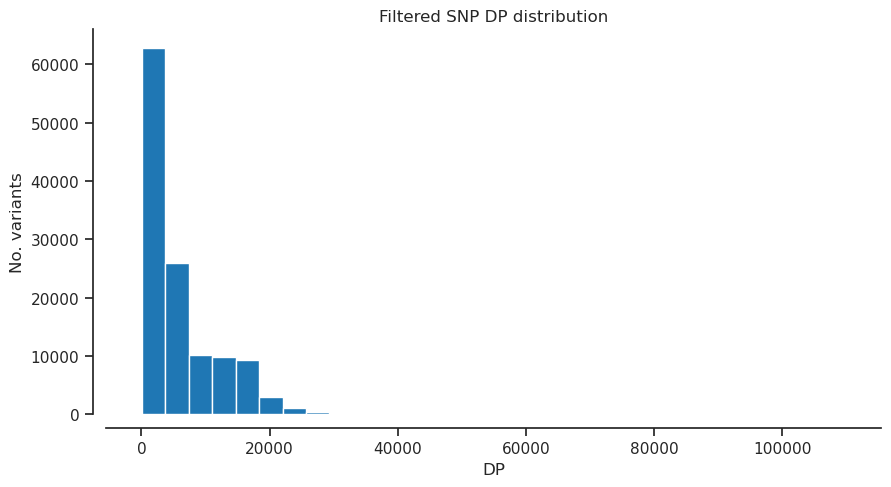

In [55]:
plot_hist('DP','sel')

In [56]:
filter_expression = '(QD >= 2.0) & (MQ >= 40.0) & (MQRankSum >= -12.5) & (SOR <= 3)'
snp_selection = biallelic_snps.query(filter_expression)[:]
snp_selection
# after other filters, SOR removes 4122 snps

<VariantTable shape=(118557,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 2, -1, -1], [0.002315,      nan,      nan], [b'C', b'', b''], 864, -1.039, b'aalba5_s00000025', 14531, -1, 0.0061, False, False, 4.224, b'.', 0.0006, [ 5, -1, -1], [0.005787,      nan,      nan], 60., 0., 190697,  2.63,   52.53, [-1, -1], b'T',  0.816, 0.188, [0, 0, 0],  True, 1)
 ([14, -1, -1], [0.016   ,      nan,      nan], [b'T', b'', b''], 864,  0.214, b'aalba5_s00000025', 12170, -1, 0.4864, False, False, 0.924, b'.', 0.077 , [15, -1, -1], [0.017   ,      nan,      nan], 60., 0., 190747, 10.61, 3256.1 , [-1, -1], b'C',  0.288, 0.61 , [0, 0, 0],  True, 1)
 ([ 6, -1, -1], [0.006944,      nan,      nan], [b'C', b'', b''], 864, -0.311, b'aalba5_s00000025', 11931, -1, 0.0784, False, False, 0.   , b'.', 0.1027, [ 7, -1, -1], [0.008102,      nan,      nan], 60., 0., 190757, 12.16, 1470.77, [-1, -1], b'T', -0.675, 0.664, [0, 0, 0],  True, 1)
 ...
 ([ 1, -1, -1], [0.001157,      nan,      nan], [b'A', b'', b''], 864,  0.   , b'aalba5_s00422950',   828, -1, 0.    , False, False, 0.   , b'.', 0.3248, [ 2, -1, -1], [0.002315,      nan,      nan], 60., 0.,   2375, 13.04,   52.16, [-1, -1], b'G',  0.674, 0.693, [0, 0, 0],  True, 1)
 ([ 1, -1, -1], [0.001157,      nan,      nan], [b'C', b'', b''], 864,  0.   , b'aalba5_s00422950',   755, -1, 0.    , False, False, 0.   , b'.', 0.324 , [ 2, -1, -1], [0.002315,      nan,      nan], 60., 0.,   2389,  9.93,   49.65, [-1, -1], b'T', -1.645, 0.446, [0, 0, 0],  True, 1)
 ([ 2, -1, -1], [0.002315,      nan,      nan], [b'A', b'', b''], 864,  0.   , b'aalba5_s00422950',   703, -1, 0.0079, False, False, 0.   , b'.', 0.3192, [ 4, -1, -1], [0.00463 ,      nan,      nan], 60., 0.,   2400, 14.79,   73.94, [-1, -1], b'G',  1.65 , 0.495, [0, 0, 0],  True, 1)]

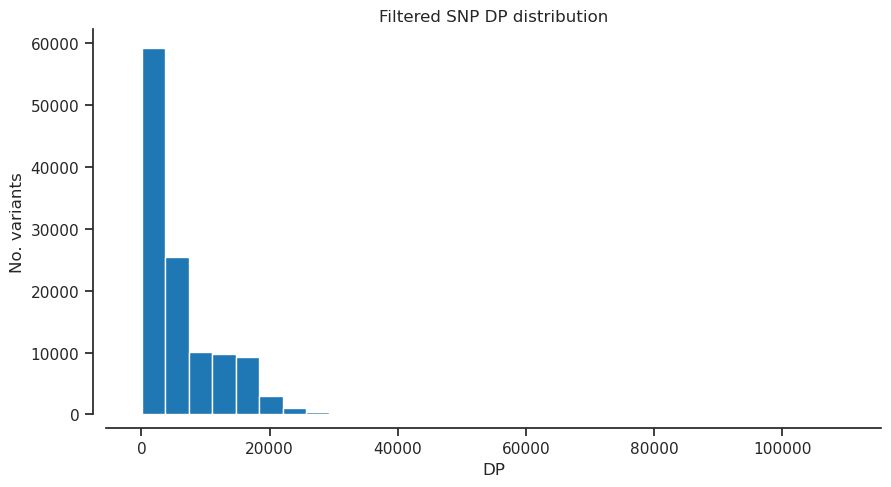

In [57]:
plot_hist('DP','sel')

## DP - Approximate read depth

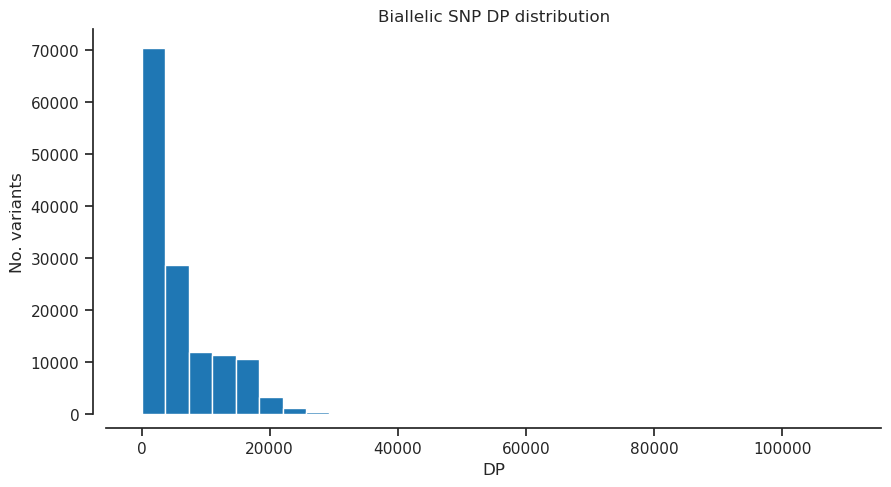

In [46]:
plot_hist('DP','biallelic')

In [30]:
filter_expression = '(DP >= 20) & (DP <= 40000)'
biallelic_snps = biallelic_snps.query(filter_expression)[:]

In [31]:
np.count_nonzero(biallelic_snps)

118371

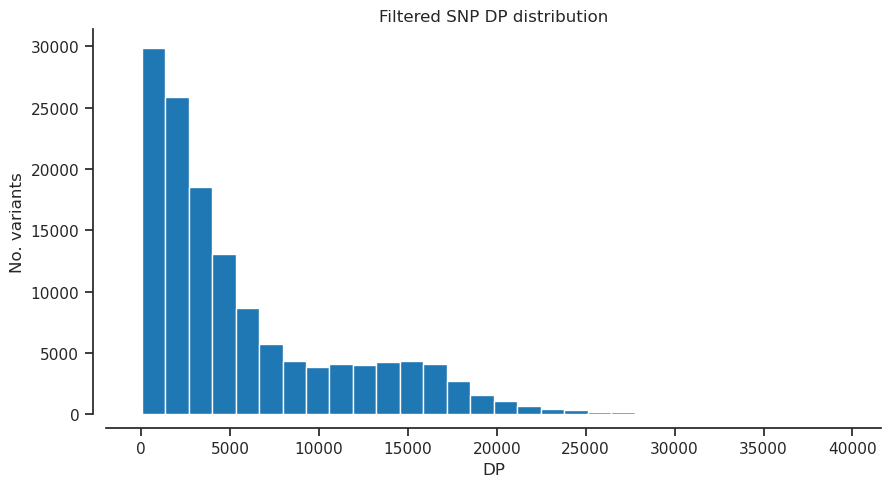

In [60]:
plot_hist('DP','sel')

In [61]:
filter_expression = '(QD >= 2.0) & (MQ >= 40.0) & (MQRankSum >= -12.5) & (SOR <= 3) & (DP >= 20) & (DP <= 40000)'
snp_selection = biallelic_snps.query(filter_expression)[:]

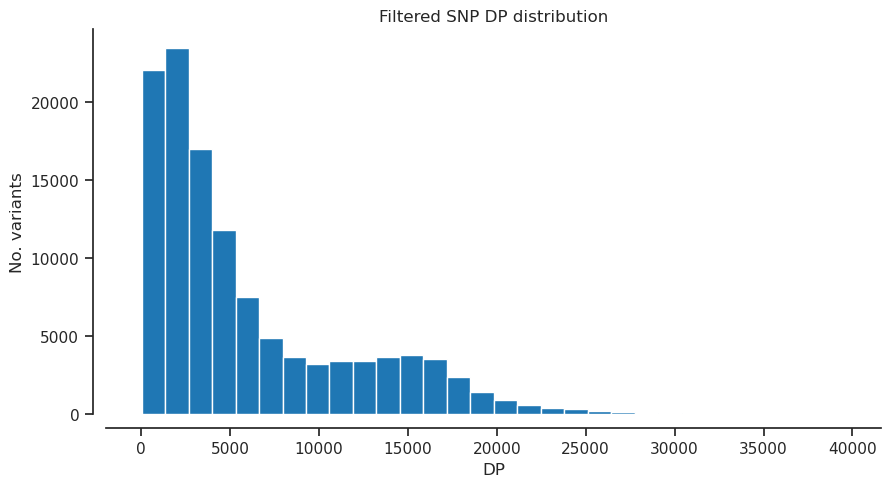

In [62]:
plot_hist('DP','sel')

## AN - Total number of alleles in called genotypes

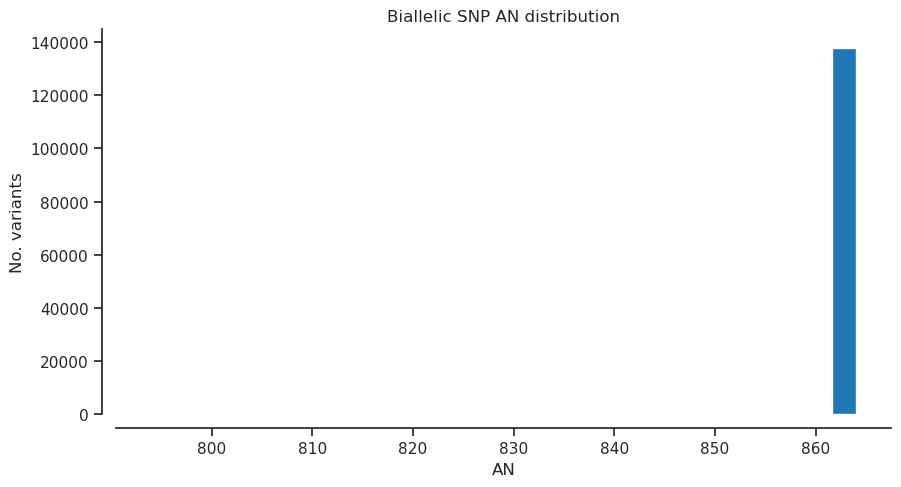

In [60]:
plot_hist('AN','biallelic') # Total number of alleles in called genotypes

In [69]:
filter_expression = '(AN <= 863)'
snp_selection = biallelic_snps.query(filter_expression)[:]

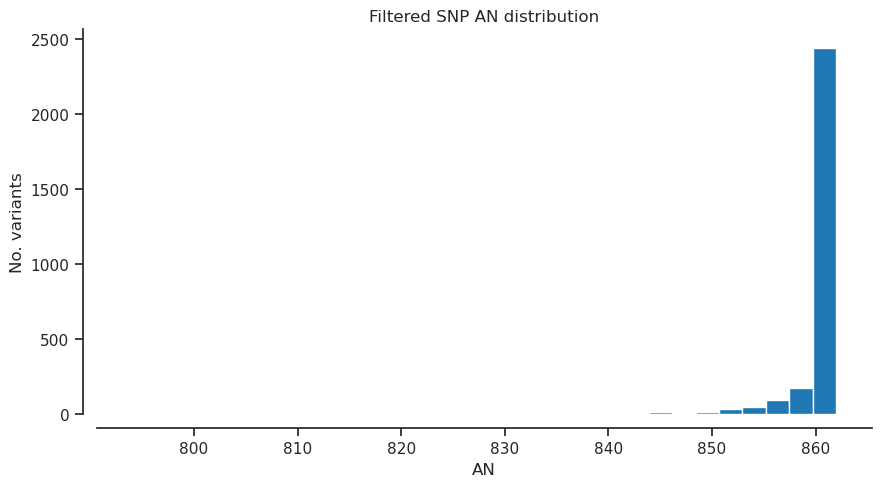

In [70]:
plot_hist('AN','sel')

In [25]:
filter_expression = '(AN < 864)'
snp_selection = biallelic_snps.query(filter_expression)[:]

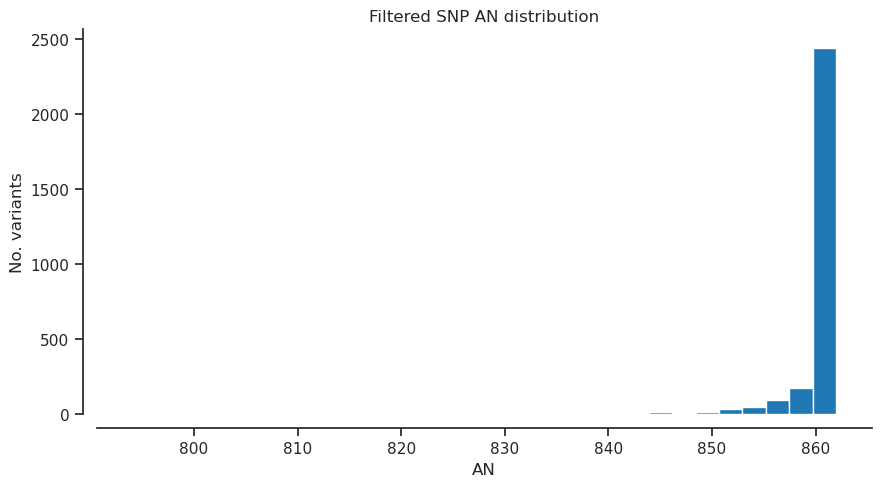

In [26]:
plot_hist('AN','sel')

## set first filter

In [6]:
filter_expression = '(QD >= 2.0) & (MQ >= 40.0) & (MQRankSum >= -12.5) & (SOR <= 3) & (DP >= 20) & (DP <= 40000)'
first_selection = biallelic_snps.query(filter_expression)[:]

## test second filters

In [112]:
def plot_second_hist(f, dsubset='', xscale='', bins=30 ):
    x = first_selection[f][:]
    l = 'First subset'
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')
    ax.set_title('%s %s distribution' % (l, f))
    if xscale == 'log':
        ax.set_xscale('log')

In [12]:
calldata_var = callset_var['calldata']
list(calldata_var)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'PS', 'RGQ', 'SB']

In [14]:
variants['DP']

<ChunkedArrayWrapper shape=(245823,) dtype=int32 chunks=(65536,)
   nbytes=960.2K cbytes=503.4K cratio=1.9
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [15]:
calldata_var['DP']

<HDF5 dataset "DP": shape (245823, 432), type "<i2">

In [9]:
formatDP = calldata['DP']

In [7]:
snp_selection = first_selection

In [ ]:
plot_hist(formatDP, 'sel')

In [106]:
formatDP

array([[ 35,  43, 113, ...,  70,  65,  80],
       [ 33,  43, 103, ...,  50,  56,  57],
       [ 33,  43, 103, ...,  50,  53,  57],
       ...,
       [  3,   7,   3, ...,   0,   2,   2],
       [  1,   6,   2, ...,   0,   1,   2],
       [  1,   4,   2, ...,   0,   0,   1]], dtype=int16)

In [110]:
biallelic_snps

<VariantTable shape=(138760,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 2, -1, -1], [0.002315,      nan,      nan], [b'C', b'', b''], 864, -1.039, b'aalba5_s00000025', 14531, -1, 0.0061, False, False, 4.224, b'.', 0.0006, [ 5, -1, -1], [0.005787,      nan,      nan], 60.,  0., 190697,  2.63,   52.53, [-1, -1], b'T', 0.816, 0.188, [0, 0, 0],  True, 1)
 ([ 2, -1, -1], [0.002315,      nan,      nan], [b'C', b'', b''], 864,  0.319, b'aalba5_s00000025', 12506, -1, 0.0053, False, False, 0.   , b'.', 0.0651, [ 1, -1, -1], [0.001157,      nan,      nan], 60.,  0., 190736,  1.74,   41.68, [-1, -1], b'T', 2.1  , 0.527, [0, 0, 0],  True, 1)
 ([14, -1, -1], [0.016   ,      nan,      nan], [b'T', b'', b''], 864,  0.214, b'aalba5_s00000025', 12170, -1, 0.4864, False, False, 0.924, b'.', 0.077 , [15, -1, -1], [0.017   ,      nan,      nan], 60.,  0., 190747, 10.61, 3256.1 , [-1, -1], b'C', 0.288, 0.61 , [0, 0, 0],  True, 1)
 ...
 ([ 2, -1, -1], [0.002315,      nan,      nan], [b'A', b'', b''], 864,  0.   , b'aalba5_s00422950',   703, -1, 0.0079, False, False, 0.   , b'.', 0.3192, [ 4, -1, -1], [0.00463 ,      nan,      nan], 60.,  0.,   2400, 14.79,   73.94, [-1, -1], b'G', 1.65 , 0.495, [0, 0, 0],  True, 1)
 ([ 2, -1, -1], [0.002315,      nan,      nan], [b'G', b'', b''], 864,    nan, b'aalba5_s00422950',   508, -1, 0.    , False, False, 0.   , b'.', 0.3516, [ 3, -1, -1], [0.003472,      nan,      nan], 60., nan,   2431, 34.35,  103.05, [-1, -1], b'A',   nan, 2.833, [0, 0, 0],  True, 1)
 ([ 2, -1, -1], [0.002315,      nan,      nan], [b'C', b'', b''], 864,    nan, b'aalba5_s00422950',   218, -1, 0.    , False, False, 0.   , b'.', 0.3548, [ 6, -1, -1], [0.006944,      nan,      nan], 60., nan,   2491, 27.53,   42.2 , [-1, -1], b'T',   nan, 1.609, [0, 0, 0],  True, 1)]

In [ ]:
secondtest = first_selection.eval()

In [109]:
first_selection

<VariantTable shape=(118371,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 2, -1, -1], [0.002315,      nan,      nan], [b'C', b'', b''], 864, -1.039, b'aalba5_s00000025', 14531, -1, 0.0061, False, False, 4.224, b'.', 0.0006, [ 5, -1, -1], [0.005787,      nan,      nan], 60., 0., 190697,  2.63,   52.53, [-1, -1], b'T',  0.816, 0.188, [0, 0, 0],  True, 1)
 ([14, -1, -1], [0.016   ,      nan,      nan], [b'T', b'', b''], 864,  0.214, b'aalba5_s00000025', 12170, -1, 0.4864, False, False, 0.924, b'.', 0.077 , [15, -1, -1], [0.017   ,      nan,      nan], 60., 0., 190747, 10.61, 3256.1 , [-1, -1], b'C',  0.288, 0.61 , [0, 0, 0],  True, 1)
 ([ 6, -1, -1], [0.006944,      nan,      nan], [b'C', b'', b''], 864, -0.311, b'aalba5_s00000025', 11931, -1, 0.0784, False, False, 0.   , b'.', 0.1027, [ 7, -1, -1], [0.008102,      nan,      nan], 60., 0., 190757, 12.16, 1470.77, [-1, -1], b'T', -0.675, 0.664, [0, 0, 0],  True, 1)
 ...
 ([ 1, -1, -1], [0.001157,      nan,      nan], [b'A', b'', b''], 864,  0.   , b'aalba5_s00422950',   828, -1, 0.    , False, False, 0.   , b'.', 0.3248, [ 2, -1, -1], [0.002315,      nan,      nan], 60., 0.,   2375, 13.04,   52.16, [-1, -1], b'G',  0.674, 0.693, [0, 0, 0],  True, 1)
 ([ 1, -1, -1], [0.001157,      nan,      nan], [b'C', b'', b''], 864,  0.   , b'aalba5_s00422950',   755, -1, 0.    , False, False, 0.   , b'.', 0.324 , [ 2, -1, -1], [0.002315,      nan,      nan], 60., 0.,   2389,  9.93,   49.65, [-1, -1], b'T', -1.645, 0.446, [0, 0, 0],  True, 1)
 ([ 2, -1, -1], [0.002315,      nan,      nan], [b'A', b'', b''], 864,  0.   , b'aalba5_s00422950',   703, -1, 0.0079, False, False, 0.   , b'.', 0.3192, [ 4, -1, -1], [0.00463 ,      nan,      nan], 60., 0.,   2400, 14.79,   73.94, [-1, -1], b'G',  1.65 , 0.495, [0, 0, 0],  True, 1)]

In [ ]:
filter_expression = (formatDP[:, 0] >= 6)

## Selected filter

In [96]:
# QD: Variant Confidence/Quality by Depth
# AN: Total number of alleles in called genotypes
final_filter_expression = '(QD >= 2.0) & (MQ >= 40.0) & (MQRankSum >= -12.5) & (SOR <= 3) & (DP >= 20) & (DP <= 40000)'
variant_selection = variants.eval(final_filter_expression)[:]
np.count_nonzero(variant_selection)

147361

## Genotype

In [92]:
list(callset_var['variants'])

['AC',
 'AF',
 'ALT',
 'AN',
 'BaseQRankSum',
 'CHROM',
 'DP',
 'END',
 'ExcessHet',
 'FILTER_LowQual',
 'FILTER_PASS',
 'FS',
 'ID',
 'InbreedingCoeff',
 'MLEAC',
 'MLEAF',
 'MQ',
 'MQRankSum',
 'POS',
 'QD',
 'QUAL',
 'RAW_MQandDP',
 'REF',
 'ReadPosRankSum',
 'SOR',
 'altlen',
 'is_snp',
 'numalt']

In [65]:
genotypes_var = allel.GenotypeChunkedArray(calldata_var['GT'])
genotypes_var

<GenotypeChunkedArray shape=(245823, 432, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=202.6M cbytes=8.3M cratio=24.5
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [95]:
# using the selected filters set above
gt_filtered_var = genotypes_var.subset(variant_selection)
gt_filtered_var

<GenotypeChunkedArray shape=(147361, 432, 2) dtype=int8 chunks=(1152, 432, 2)
   nbytes=121.4M cbytes=9.1M cratio=13.3
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [67]:
# grab the allele counts for the populations
ac = gt_filtered_var.count_alleles()
ac

<AlleleCountsChunkedArray shape=(147361, 7) dtype=int32 chunks=(18421, 7)
   nbytes=3.9M cbytes=484.9K cratio=8.3
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [68]:
ac[:]

<AlleleCountsArray shape=(147361, 7) dtype=int32>
862   2   0   0   0   0   0
863   1   0   0   0   0   0
850  14   0   0   0   0   0
...
863   1   0   0   0   0   0
863   1   0   0   0   0   0
862   2   0   0   0   0   0

In [69]:
# Which ones are biallelic?
is_biallelic_01 = ac.is_biallelic_01()[:]
ac1 = ac.compress(is_biallelic_01, axis=0)[:, :2]
ac1
##this part of the code is only for graphing the SFS, is not useful for filtering biallelic sites

array([[862,   2],
       [863,   1],
       [850,  14],
       ...,
       [863,   1],
       [863,   1],
       [862,   2]], dtype=int32)

<Axes: xlabel='derived allele frequency', ylabel='site frequency'>

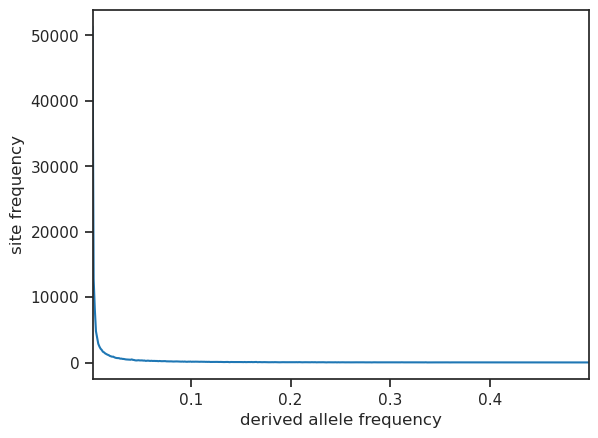

In [70]:
# plot the sfs of the derived allele
s = allel.sfs_folded(ac1)
allel.plot_sfs(s, yscale="linear", n=ac1.sum(axis=1).max())

In [71]:
biallelic = (ac.max_allele() == 1)
###This is the filter expression for biallelic sites
biallelic

<ChunkedArrayWrapper shape=(147361,) dtype=bool chunks=(147361,)
   nbytes=143.9K cbytes=29.7K cratio=4.8
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [73]:
# select only the biallelic variants
gt_biallelic = gt_filtered_var.compress(biallelic)
gt_biallelic

<GenotypeChunkedArray shape=(135792, 432, 2) dtype=int8 chunks=(1061, 432, 2)
   nbytes=111.9M cbytes=7.7M cratio=14.5
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [74]:
n_variants = len(gt_biallelic)
n_variants

135792

In [75]:
pc_missing = gt_biallelic.count_missing(axis=0)[:] * 100 / n_variants
pc_het = gt_biallelic.count_het(axis=0)[:] * 100 / n_variants

In [76]:
gt_biallelic

<GenotypeChunkedArray shape=(135792, 432, 2) dtype=int8 chunks=(1061, 432, 2)
   nbytes=111.9M cbytes=7.7M cratio=14.5
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

## GT filtering

In [94]:
variant_selection

array([ True,  True, False, ...,  True, False, False])

## Samples

In [77]:
samples_var = callset_var['samples']
samples_var = list(samples_var)
samples_var

[b'1-ATAA51-001-AA01-A01',
 b'10-ATAA51-010-AA01-B02',
 b'100-ITAA57-025-AA02-D01',
 b'101-SIAA62-001-AA02-E01',
 b'102-SIAA62-002-AA02-F01',
 b'103-SIAA62-003-AA02-G01',
 b'104-SIAA62-004-AA02-H01',
 b'105-SIAA62-005-AA02-A02',
 b'106-SIAA62-006-AA02-B02',
 b'107-SIAA62-007-AA02-C02',
 b'108-SIAA62-008-AA02-D02',
 b'109-SIAA62-009-AA02-E02',
 b'11-ATAA51-011-AA01-C02',
 b'110-SIAA62-010-AA02-F02',
 b'111-SIAA62-011-AA02-G02',
 b'112-SIAA62-012-AA02-H02',
 b'113-SIAA62-013-AA02-A03',
 b'114-SIAA62-014-AA02-B03',
 b'115-SIAA62-015-AA02-C03',
 b'116-SIAA62-016-AA02-D03',
 b'117-SIAA62-017-AA02-E03',
 b'118-SIAA62-018-AA02-F03',
 b'119-SIAA62-019-AA02-G03',
 b'12-ATAA51-012-AA01-D02',
 b'120-SIAA62-020-AA02-H03',
 b'121-SIAA62-021-AA02-A04',
 b'122-SIAA62-022-AA02-B04',
 b'123-SIAA62-023-AA02-C04',
 b'124-SIAA62-024-AA02-D04',
 b'125-SIAA62-025-AA02-E04',
 b'126-SIAA63-001-AA02-F04',
 b'127-SIAA63-002-AA02-G04',
 b'128-SIAA63-003-AA02-H04',
 b'129-SIAA63-004-AA02-A05',
 b'13-ATAA51-013-AA

In [78]:
samples_fn = '~/scratch/data/Aalba/aalba_sample_list-scikit-allel.txt'
samples = pandas.read_csv(samples_fn, sep='\t')
samples

,ID,Population
0,1-ATAA51-001-AA01-A01,AUT00179
1,10-ATAA51-010-AA01-B02,AUT00179
2,100-ITAA57-025-AA02-D01,ITA00271
3,101-SIAA62-001-AA02-E01,SVN00025
4,102-SIAA62-002-AA02-F01,SVN00025
...,...,...
427,95-ITAA57-020-AA01-G12,ITA00271
428,96-ITAA57-021-AA01-H12,ITA00271
429,97-ITAA57-022-AA02-A01,ITA00271
430,98-ITAA57-023-AA02-B01,ITA00271


In [79]:
samples.Population.value_counts()

Population
AUT00179    25
ITA00271    25
SVN00025    25
SVN00023    25
ITA00260    25
ROU00358    25
ROU00104    25
ROU00389    25
ROU00477    25
AUT00215    25
DEU00114    25
FRA00006    25
ITA00069    25
ITA00029    25
ITA00217    25
FRA00019    19
ESP00339    19
FRA00004    19
Name: count, dtype: int64

In [80]:
populations = samples.Population.unique()
populations
###This identifiers come from the metadata file

array(['AUT00179', 'ITA00271', 'SVN00025', 'SVN00023', 'ITA00260',
       'ROU00358', 'ROU00104', 'ROU00389', 'ROU00477', 'AUT00215',
       'DEU00114', 'FRA00006', 'ITA00069', 'FRA00019', 'FRA00004',
       'ESP00339', 'ITA00217', 'ITA00029'], dtype=object)

## Gt frequency function

In [81]:
def plot_genotype_frequency(pc, title):
    fig, ax = plt.subplots(figsize=(24, 5))
    sns.despine(ax=ax, offset=24)
    left = np.arange(len(pc))
    palette = sns.color_palette("hls", 24)
    pop2color = {'AUT00179': palette[7],
                 'ITA00271': palette[1],
                 'SVN00025': palette[2],
                 'SVN00023': palette[3],
                 'ITA00260': palette[22],
                 'ROU00358': palette[5],
                 'ROU00104': palette[6],
                 'ROU00389': palette[0],
                 'ROU00477': palette[8],
                 'AUT00215': palette[9],
                 'DEU00114': palette[10],
                 'FRA00006': palette[11],
                 'ITA00069': palette[12],
                 'ITA00029': palette[13],
                 'ITA00217': palette[14],
                 'FRA00019': palette[15],
                 'ESP00339': palette[16],
                 'FRA00004': palette[17]}
    colors = [pop2color[p] for p in samples.Population]
    ax.bar(left, pc, color=colors)
    ax.set_xlim(0, len(pc))
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Percent calls')
    ax.set_title(title)
    handles = [mpl.patches.Patch(color=palette[7]),
               mpl.patches.Patch(color=palette[1]),
               mpl.patches.Patch(color=palette[2]),
               mpl.patches.Patch(color=palette[3]),
               mpl.patches.Patch(color=palette[22]),
               mpl.patches.Patch(color=palette[5]),
               mpl.patches.Patch(color=palette[6]),
               mpl.patches.Patch(color=palette[0]),
               mpl.patches.Patch(color=palette[8]),
               mpl.patches.Patch(color=palette[9]),
               mpl.patches.Patch(color=palette[10]),
               mpl.patches.Patch(color=palette[11]),
               mpl.patches.Patch(color=palette[12]),
               mpl.patches.Patch(color=palette[13]),
               mpl.patches.Patch(color=palette[14]),
               mpl.patches.Patch(color=palette[15]),
               mpl.patches.Patch(color=palette[16]),
               mpl.patches.Patch(color=palette[17])]
    ax.legend(handles=handles, labels=['AUT00179', 'ITA00271', 'SVN00025', 'SVN00023', 'ITA00260',
       'ROU00358', 'ROU00104', 'ROU00389', 'ROU00477', 'AUT00215',
       'DEU00114', 'FRA00006', 'ITA00069', 'FRA00019', 'FRA00004',
       'ESP00339', 'ITA00217', 'ITA00029'], title='Population',
              bbox_to_anchor=(1, 1), loc='upper left')

## Plot missing

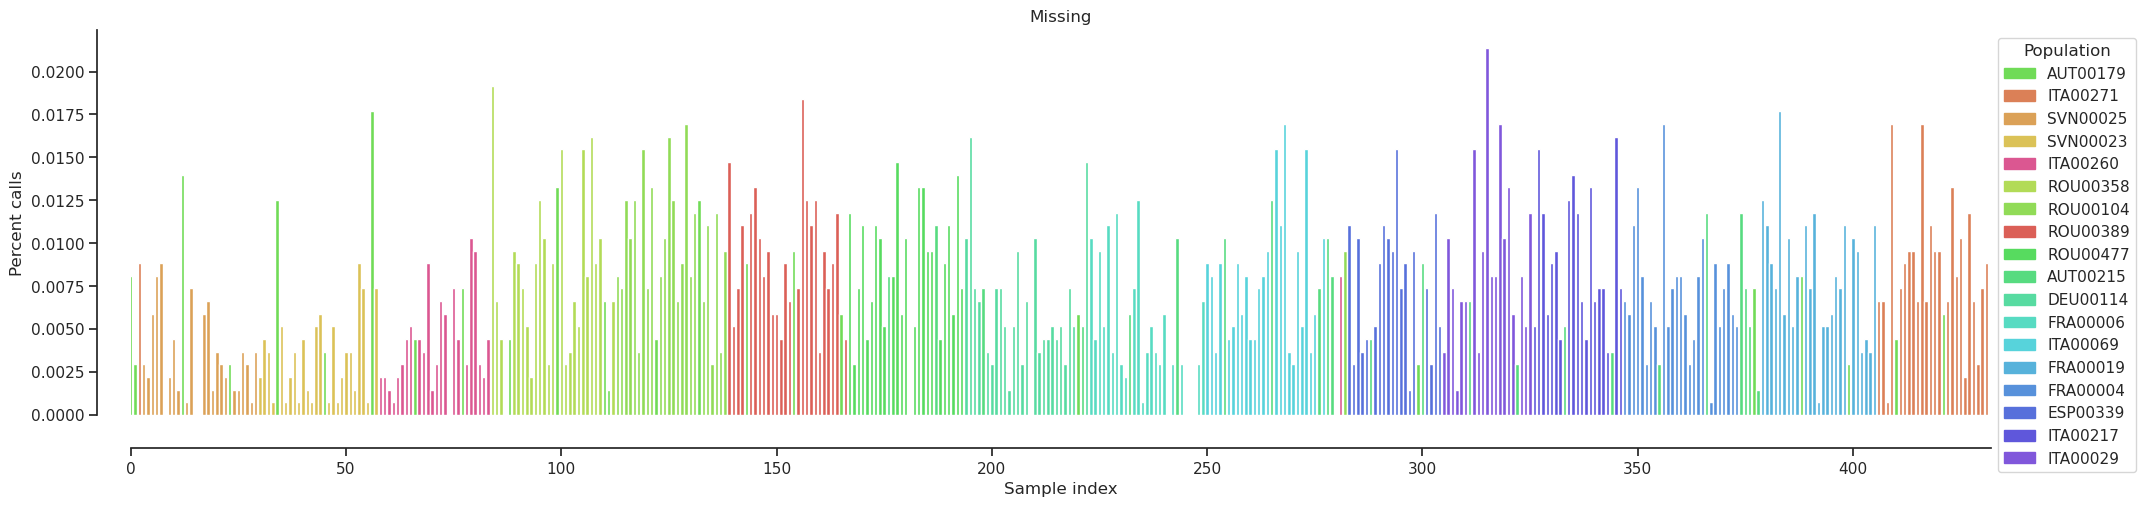

In [82]:
plot_genotype_frequency(pc_missing, 'Missing')

In [83]:
# sample with highest amount of missing data
np.argsort(pc_missing)[-19:]

array([119, 294, 266, 100, 107, 195, 125, 345, 356, 416, 318, 129, 409,
       268, 383,  56, 156,  84, 315])

In [ ]:
pc_missing

In [ ]:
samples[345:346]

In [ ]:
samples.ID[345]

## Plot heterozygosity

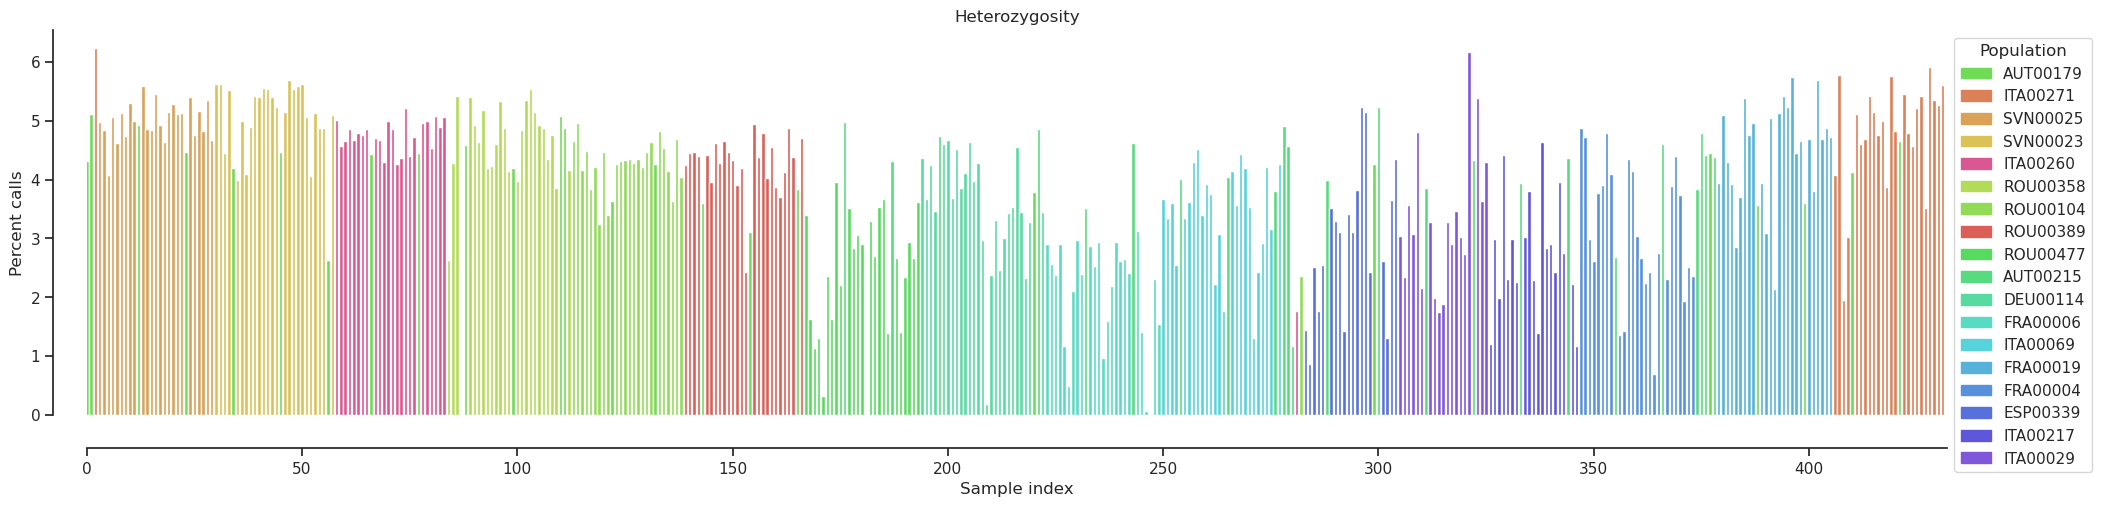

In [84]:
plot_genotype_frequency(pc_het, 'Heterozygosity')

## PCA

In [85]:
palette = sns.color_palette("hls",23)
pop_colours = {    
                'AUT00179': palette[7],
                 'ITA00271': palette[1],
                 'SVN00025': palette[2],
                 'SVN00023': palette[3],
                 'ITA00260': palette[22],
                 'ROU00358': palette[5],
                 'ROU00104': palette[6],
                 'ROU00389': palette[0],
                 'ROU00477': palette[8],
                 'AUT00215': palette[9],
                 'DEU00114': palette[10],
                 'FRA00006': palette[11],
                 'ITA00069': palette[12],
                 'ITA00029': palette[13],
                 'ITA00217': palette[14],
                 'FRA00019': palette[15],
                 'ESP00339': palette[16],
                 'FRA00004': palette[17]
}

In [86]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=pop_colours[pop], 
                label=pop, markersize=6, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples.Population
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

In [87]:
ac2 = gt_biallelic.count_alleles()
ac2

<AlleleCountsChunkedArray shape=(135792, 2) dtype=int32 chunks=(33948, 2)
   nbytes=1.0M cbytes=255.0K cratio=4.2
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [88]:
flt = (ac2[:, :2].min(axis=1) > 1)
gf = gt_biallelic.compress(flt, axis=0)
gn = gf.to_n_alt()
gn

<ChunkedArrayWrapper shape=(84442, 432) dtype=int8 chunks=(2639, 432)
   nbytes=34.8M cbytes=5.1M cratio=6.8
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [89]:
coords1, model1 = allel.pca(gn, n_components=10, scaler='patterson')

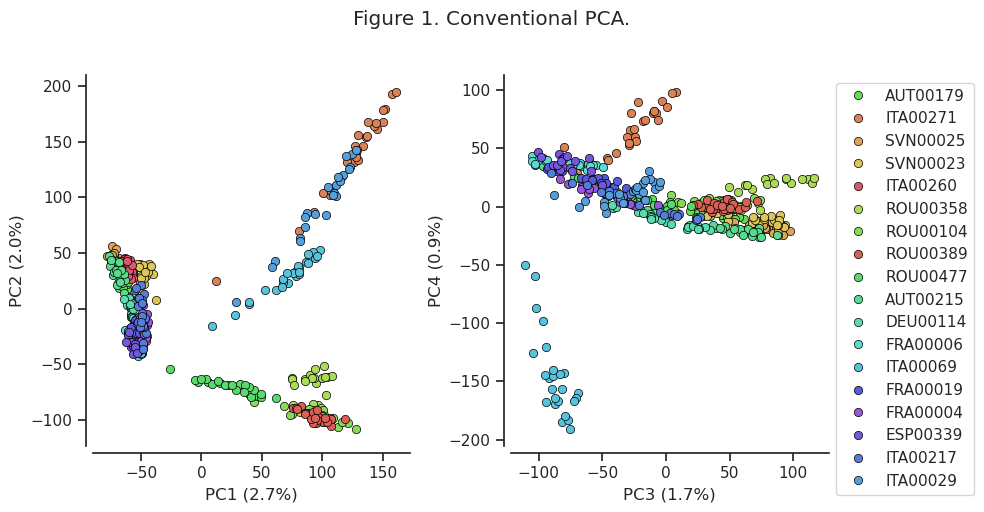

In [90]:
fig_pca(coords1, model1, 'Figure 1. Conventional PCA.')